<a href="https://colab.research.google.com/github/sheheryarsalman/2048/blob/master/Descriptive%20Analytics%20-%20OP_Schedule_Usage_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from decimal import Decimal
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.pyplot as plt

### Reading the data

In [ ]:
# Load the data into a pandas DataFrame
df = pd.read_csv('visit_offpeakv4.csv', low_memory=False)

### Data Cleaning & Exploration

In [ ]:
# Displaying the first few rows of the data
df.head()

,visit_key,center_id,check_in_datetime,check_out_datetime,check_in_result,gender,age,product_group,check_in_date,check_out_date,...,offpeak_SS,offpeak_MF_1_OPEN,offpeak_MF_1_CLOSE,offpeak_MF_2_OPEN,offpeak_MF_2_CLOSE,offpeak_MF_3_OPEN,offpeak_MF_3_CLOSE,offpeak_MF_4_OPEN,offpeak_MF_4_CLOSE,combined_offpeak_mask
0,9aad68bf43137ca99ebf646bf83f6093760571d4acb966...,168,2023-07-01 13:02:47+00:00,2023-07-01 14:47:08+00:00,ACCESS_GRANTED,MALE,41,MULTI GYM,2023-07-01,2023-07-01,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
1,6b31f596c1b22d4124bfe72a2a452d59819ed3c937485f...,168,2023-06-26 13:35:57+00:00,2023-06-26 14:53:40+00:00,ACCESS_GRANTED,FEMALE,28,CORE,2023-06-26,2023-06-26,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
2,c983d9bef7cf217dbda613454d9d6832bce4176e65ac2f...,168,2022-09-13 23:00:56+00:00,2022-09-14 02:30:56+00:00,ACCESS_GRANTED,FEMALE,27,CORE,2022-09-13,2022-09-14,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
3,02b2df1f7b25046f2ce046704c808eff2a3bf873b3508a...,168,2023-05-08 13:44:10+00:00,2023-05-08 14:55:46+00:00,ACCESS_GRANTED,FEMALE,27,CORE,2023-05-08,2023-05-08,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
4,db4d954ff6a26a7068543c101df3960282453709f172b0...,168,2023-07-08 11:34:44+00:00,2023-07-08 12:33:53+00:00,ACCESS_GRANTED,FEMALE,28,CORE,2023-07-08,2023-07-08,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True


In [ ]:
#Display rows with empty cells
df[df.isna().any(axis=1)]

,visit_key,center_id,check_in_datetime,check_out_datetime,check_in_result,gender,age,product_group,check_in_date,check_out_date,...,offpeak_SS,offpeak_MF_1_OPEN,offpeak_MF_1_CLOSE,offpeak_MF_2_OPEN,offpeak_MF_2_CLOSE,offpeak_MF_3_OPEN,offpeak_MF_3_CLOSE,offpeak_MF_4_OPEN,offpeak_MF_4_CLOSE,combined_offpeak_mask
95103,8761fa65f4c19a78879131bf937eb310110cc03fc6159a...,264,2023-06-25 14:08:13+00:00,2023-06-25 14:49:40+00:00,ACCESS_GRANTED,MALE,30,CORE,2023-06-25,2023-06-25,...,All Day,00:00:00,16:00:00,21:00:00,00:00:00,NaN,NaN,NaN,NaN,True
95104,507a873e3a4d2189dfdcefbdf13ee23b4dd8fa61901bea...,264,2023-06-27 14:24:27+00:00,2023-06-27 15:11:40+00:00,ACCESS_GRANTED,MALE,30,PLUS,2023-06-27,2023-06-27,...,All Day,00:00:00,16:00:00,21:00:00,00:00:00,NaN,NaN,NaN,NaN,True
95105,a9a3cfcffb91568bd522059ba2a8e0718ea049234d570f...,264,2023-06-26 14:35:53+00:00,2023-06-26 15:33:55+00:00,ACCESS_GRANTED,MALE,30,PLUS,2023-06-26,2023-06-26,...,All Day,00:00:00,16:00:00,21:00:00,00:00:00,NaN,NaN,NaN,NaN,True
95106,be22b568204e27a73727ca3d91f8409a72093dd6c04f06...,264,2023-06-28 13:51:10+00:00,2023-06-28 14:37:21+00:00,ACCESS_GRANTED,MALE,30,PLUS,2023-06-28,2023-06-28,...,All Day,00:00:00,16:00:00,21:00:00,00:00:00,NaN,NaN,NaN,NaN,True
95107,2e50b50d3666ba4c8bddeb57c3ad3e6c730f4e3fd8129a...,264,2023-06-30 14:24:44+00:00,2023-06-30 15:22:38+00:00,ACCESS_GRANTED,MALE,30,PLUS,2023-06-30,2023-06-30,...,All Day,00:00:00,16:00:00,21:00:00,00:00:00,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356531,040ff59a34efea9242fa52c020b1a13fca78ddecbcb839...,174,2023-06-25 10:13:27+00:00,2023-06-25 11:10:24+00:00,ACCESS_GRANTED,MALE,37,CORE,2023-06-25,2023-06-25,...,All Day,00:00:00,15:30:00,20:30:00,00:00:00,NaN,NaN,NaN,NaN,True
356532,9d6715679ed44d288ce10e33f8fd0e781caa0a200209f2...,174,2023-08-27 10:35:21+00:00,2023-08-27 11:29:03+00:00,ACCESS_GRANTED,MALE,37,CORE,2023-08-27,2023-08-27,...,All Day,00:00:00,15:30:00,20:30:00,00:00:00,NaN,NaN,NaN,NaN,True
356533,0f4d6549531ff8d43fff435052d98c7be191e9be0cd229...,174,2023-08-28 08:53:06+00:00,2023-08-28 09:45:23+00:00,ACCESS_GRANTED,FEMALE,32,OFF PEAK,2023-08-28,2023-08-28,...,All Day,00:00:00,15:30:00,20:30:00,00:00:00,NaN,NaN,NaN,NaN,True
356534,351c7f74e7d0d0d8602f2cee2925f093dd5d3829b7b019...,174,2023-08-20 17:05:10+00:00,2023-08-20 18:33:41+00:00,ACCESS_GRANTED,FEMALE,32,OFF PEAK,2023-08-20,2023-08-20,...,All Day,00:00:00,15:30:00,20:30:00,00:00:00,NaN,NaN,NaN,NaN,True


In [ ]:
#list columns with empty cells
df.columns[df.isna().any()].tolist()

['offpeak_MF_3',
 'offpeak_MF_4',
 'offpeak_MF_3_OPEN',
 'offpeak_MF_3_CLOSE',
 'offpeak_MF_4_OPEN',
 'offpeak_MF_4_CLOSE']

In [ ]:
# Inserting '1:30pm - 4:00pm' (MF_3 Schedule) into 'offpeak_MF_3' where the row data is NaT
df.loc[df['offpeak_MF_3'].isna(), 'offpeak_MF_3'] = '1:30pm -4:00pm'

# Inserting '9:00pm - 12:00am'(MF_4 Schedule)  into 'offpeak_MF_4' where the row data is NaT
df.loc[df['offpeak_MF_4'].isna(), 'offpeak_MF_4'] = '9:00pm -12:00am'

# Inserting '13:30:00'(MF_3 open time Schedule)  into 'offpeak_MF_3_OPEN' where the row data is NaT
df.loc[df['offpeak_MF_3_OPEN'].isna(), 'offpeak_MF_3_OPEN'] = '13:30:00'

# Inserting '16:00:00'(MF_3 close time Schedule)  into 'offpeak_MF_3_OCLOSE' where the row data is NaT
df.loc[df['offpeak_MF_3_CLOSE'].isna(), 'offpeak_MF_3_CLOSE'] = '16:00:00'

# Inserting '09:00:00'(MF_4 open time Schedule)  into 'offpeak_MF_4_OPEN' where the row data is NaT
df.loc[df['offpeak_MF_4_OPEN'].isna(), 'offpeak_MF_4_OPEN'] = '09:00:00'

# Inserting '00:00:00'(MF_4 close time Schedule)  into 'offpeak_MF_4_OCLOSE' where the row data is NaT
df.loc[df['offpeak_MF_4_CLOSE'].isna(), 'offpeak_MF_4_CLOSE'] = '00:00:00'

In [ ]:
#Checking df for empty rows
df[df.isna().any(axis=1)]

,visit_key,center_id,check_in_datetime,check_out_datetime,check_in_result,gender,age,product_group,check_in_date,check_out_date,...,offpeak_SS,offpeak_MF_1_OPEN,offpeak_MF_1_CLOSE,offpeak_MF_2_OPEN,offpeak_MF_2_CLOSE,offpeak_MF_3_OPEN,offpeak_MF_3_CLOSE,offpeak_MF_4_OPEN,offpeak_MF_4_CLOSE,combined_offpeak_mask


In [ ]:
# Convert 'check_in_datetime' column to datetime type
df['check_in_datetime'] = pd.to_datetime(df['check_in_datetime'])

In [ ]:
# Extract date part
df['check_in_date'] = df['check_in_datetime'].dt.date

In [ ]:
# Extract time part
df['check_in_time'] = df['check_in_datetime'].dt.time

In [ ]:
# Dropping the original datetime column
df.drop(columns=['check_in_datetime'], inplace=True)

In [ ]:
# Convert 'check_out_datetime' column to datetime type
df['check_out_datetime'] = pd.to_datetime(df['check_out_datetime'])

In [ ]:
# Extract date part
df['check_out_date'] = df['check_out_datetime'].dt.date

In [ ]:
# Extract time part
df['check_out_time'] = df['check_out_datetime'].dt.time

In [ ]:
# Dropping the original datetime column
df.drop(columns=['check_out_datetime'], inplace=True)

In [ ]:
# Displaying the first few rows of the data
df.head()

,visit_key,center_id,check_in_result,gender,age,product_group,check_in_date,check_out_date,is_weekend,check_in_time,...,offpeak_SS,offpeak_MF_1_OPEN,offpeak_MF_1_CLOSE,offpeak_MF_2_OPEN,offpeak_MF_2_CLOSE,offpeak_MF_3_OPEN,offpeak_MF_3_CLOSE,offpeak_MF_4_OPEN,offpeak_MF_4_CLOSE,combined_offpeak_mask
0,9aad68bf43137ca99ebf646bf83f6093760571d4acb966...,168,ACCESS_GRANTED,MALE,41,MULTI GYM,2023-07-01,2023-07-01,True,13:02:47,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
1,6b31f596c1b22d4124bfe72a2a452d59819ed3c937485f...,168,ACCESS_GRANTED,FEMALE,28,CORE,2023-06-26,2023-06-26,False,13:35:57,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
2,c983d9bef7cf217dbda613454d9d6832bce4176e65ac2f...,168,ACCESS_GRANTED,FEMALE,27,CORE,2022-09-13,2022-09-14,False,23:00:56,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
3,02b2df1f7b25046f2ce046704c808eff2a3bf873b3508a...,168,ACCESS_GRANTED,FEMALE,27,CORE,2023-05-08,2023-05-08,False,13:44:10,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
4,db4d954ff6a26a7068543c101df3960282453709f172b0...,168,ACCESS_GRANTED,FEMALE,28,CORE,2023-07-08,2023-07-08,True,11:34:44,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True


In [ ]:
# Convert the datatypes
df['visit_key'] = df['visit_key'].astype(str)
df['center_id'] = df['center_id'].astype(str)
df['check_in_result'] = df['check_in_result'].astype(str)
df['gender'] = df['gender'].astype(str)
df['age'] = df['age'].astype(int)
df['product_group'] = df['product_group'].astype(str)
df['check_in_date'] = pd.to_datetime(df['check_in_date'])
df['check_out_date'] = pd.to_datetime(df['check_out_date'])
df['check_in_time'] = df['check_in_time'].astype(object)
df['check_out_time'] = df['check_out_time'].astype(object)
df['opening_date'] = pd.to_datetime(df['opening_date'])
df['format'] = df['format'].astype(str)
df['country'] = df['country'].astype(str)
df['division'] = df['division'].astype(str)
df['region'] = df['region'].astype(str)
df['studio'] = df['studio'].astype(str)
df['spin'] = df['spin'].astype(str)
df['functional'] = df['functional'].astype(str)
df['offpeak_SS'] = df['offpeak_SS'].astype(str)

In [ ]:
# Displaying the dataframe
df

,visit_key,center_id,check_in_result,gender,age,product_group,check_in_date,check_out_date,is_weekend,check_in_time,...,offpeak_SS,offpeak_MF_1_OPEN,offpeak_MF_1_CLOSE,offpeak_MF_2_OPEN,offpeak_MF_2_CLOSE,offpeak_MF_3_OPEN,offpeak_MF_3_CLOSE,offpeak_MF_4_OPEN,offpeak_MF_4_CLOSE,combined_offpeak_mask
0,9aad68bf43137ca99ebf646bf83f6093760571d4acb966...,168,ACCESS_GRANTED,MALE,41,MULTI GYM,2023-07-01,2023-07-01,True,13:02:47,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
1,6b31f596c1b22d4124bfe72a2a452d59819ed3c937485f...,168,ACCESS_GRANTED,FEMALE,28,CORE,2023-06-26,2023-06-26,False,13:35:57,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
2,c983d9bef7cf217dbda613454d9d6832bce4176e65ac2f...,168,ACCESS_GRANTED,FEMALE,27,CORE,2022-09-13,2022-09-14,False,23:00:56,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
3,02b2df1f7b25046f2ce046704c808eff2a3bf873b3508a...,168,ACCESS_GRANTED,FEMALE,27,CORE,2023-05-08,2023-05-08,False,13:44:10,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
4,db4d954ff6a26a7068543c101df3960282453709f172b0...,168,ACCESS_GRANTED,FEMALE,28,CORE,2023-07-08,2023-07-08,True,11:34:44,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356531,040ff59a34efea9242fa52c020b1a13fca78ddecbcb839...,174,ACCESS_GRANTED,MALE,37,CORE,2023-06-25,2023-06-25,True,10:13:27,...,All Day,00:00:00,15:30:00,20:30:00,00:00:00,13:30:00,16:00:00,09:00:00,00:00:00,True
356532,9d6715679ed44d288ce10e33f8fd0e781caa0a200209f2...,174,ACCESS_GRANTED,MALE,37,CORE,2023-08-27,2023-08-27,True,10:35:21,...,All Day,00:00:00,15:30:00,20:30:00,00:00:00,13:30:00,16:00:00,09:00:00,00:00:00,True
356533,0f4d6549531ff8d43fff435052d98c7be191e9be0cd229...,174,ACCESS_GRANTED,FEMALE,32,OFF PEAK,2023-08-28,2023-08-28,False,08:53:06,...,All Day,00:00:00,15:30:00,20:30:00,00:00:00,13:30:00,16:00:00,09:00:00,00:00:00,True
356534,351c7f74e7d0d0d8602f2cee2925f093dd5d3829b7b019...,174,ACCESS_GRANTED,FEMALE,32,OFF PEAK,2023-08-20,2023-08-20,True,17:05:10,...,All Day,00:00:00,15:30:00,20:30:00,00:00:00,13:30:00,16:00:00,09:00:00,00:00:00,True


In [ ]:
# Displaying basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356536 entries, 0 to 356535
Data columns (total 34 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   visit_key                            356536 non-null  object        
 1   center_id                            356536 non-null  object        
 2   check_in_result                      356536 non-null  object        
 3   gender                               356536 non-null  object        
 4   age                                  356536 non-null  int64         
 5   product_group                        356536 non-null  object        
 6   check_in_date                        356536 non-null  datetime64[ns]
 7   check_out_date                       356536 non-null  datetime64[ns]
 8   is_weekend                           356536 non-null  bool          
 9   check_in_time                        356536 non-null  object        
 

In [ ]:
# Filter rows where 'check_in_time' is not equal to 'check_out_time'
df = df[df['check_in_time'] != df['check_out_time']]

# Print the DataFrame after removing rows
df

,visit_key,center_id,check_in_result,gender,age,product_group,check_in_date,check_out_date,is_weekend,check_in_time,...,offpeak_SS,offpeak_MF_1_OPEN,offpeak_MF_1_CLOSE,offpeak_MF_2_OPEN,offpeak_MF_2_CLOSE,offpeak_MF_3_OPEN,offpeak_MF_3_CLOSE,offpeak_MF_4_OPEN,offpeak_MF_4_CLOSE,combined_offpeak_mask
0,9aad68bf43137ca99ebf646bf83f6093760571d4acb966...,168,ACCESS_GRANTED,MALE,41,MULTI GYM,2023-07-01,2023-07-01,True,13:02:47,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
1,6b31f596c1b22d4124bfe72a2a452d59819ed3c937485f...,168,ACCESS_GRANTED,FEMALE,28,CORE,2023-06-26,2023-06-26,False,13:35:57,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
2,c983d9bef7cf217dbda613454d9d6832bce4176e65ac2f...,168,ACCESS_GRANTED,FEMALE,27,CORE,2022-09-13,2022-09-14,False,23:00:56,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
3,02b2df1f7b25046f2ce046704c808eff2a3bf873b3508a...,168,ACCESS_GRANTED,FEMALE,27,CORE,2023-05-08,2023-05-08,False,13:44:10,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
4,db4d954ff6a26a7068543c101df3960282453709f172b0...,168,ACCESS_GRANTED,FEMALE,28,CORE,2023-07-08,2023-07-08,True,11:34:44,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356531,040ff59a34efea9242fa52c020b1a13fca78ddecbcb839...,174,ACCESS_GRANTED,MALE,37,CORE,2023-06-25,2023-06-25,True,10:13:27,...,All Day,00:00:00,15:30:00,20:30:00,00:00:00,13:30:00,16:00:00,09:00:00,00:00:00,True
356532,9d6715679ed44d288ce10e33f8fd0e781caa0a200209f2...,174,ACCESS_GRANTED,MALE,37,CORE,2023-08-27,2023-08-27,True,10:35:21,...,All Day,00:00:00,15:30:00,20:30:00,00:00:00,13:30:00,16:00:00,09:00:00,00:00:00,True
356533,0f4d6549531ff8d43fff435052d98c7be191e9be0cd229...,174,ACCESS_GRANTED,FEMALE,32,OFF PEAK,2023-08-28,2023-08-28,False,08:53:06,...,All Day,00:00:00,15:30:00,20:30:00,00:00:00,13:30:00,16:00:00,09:00:00,00:00:00,True
356534,351c7f74e7d0d0d8602f2cee2925f093dd5d3829b7b019...,174,ACCESS_GRANTED,FEMALE,32,OFF PEAK,2023-08-20,2023-08-20,True,17:05:10,...,All Day,00:00:00,15:30:00,20:30:00,00:00:00,13:30:00,16:00:00,09:00:00,00:00:00,True


In [ ]:
#Investigating rows with 'ACCESS_DENIED'
accessDenied_rows = df[df['check_in_result'] == 'ACCESS_DENIED'][['check_in_time', 'check_out_time']]
accessDenied_rows

,check_in_time,check_out_time
33943,20:22:29,20:22:32
55142,23:46:25,00:34:47
280144,23:27:29,00:17:14
297493,22:05:24,22:05:30


In [ ]:
# Create a new Dataframe excluding 'Access Denied entries'
off_peak_schedule_attendance = df[df['check_in_result'] != 'ACCESS_DENIED'].copy()

# view the new DataFrame
off_peak_schedule_attendance

,visit_key,center_id,check_in_result,gender,age,product_group,check_in_date,check_out_date,is_weekend,check_in_time,...,offpeak_SS,offpeak_MF_1_OPEN,offpeak_MF_1_CLOSE,offpeak_MF_2_OPEN,offpeak_MF_2_CLOSE,offpeak_MF_3_OPEN,offpeak_MF_3_CLOSE,offpeak_MF_4_OPEN,offpeak_MF_4_CLOSE,combined_offpeak_mask
0,9aad68bf43137ca99ebf646bf83f6093760571d4acb966...,168,ACCESS_GRANTED,MALE,41,MULTI GYM,2023-07-01,2023-07-01,True,13:02:47,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
1,6b31f596c1b22d4124bfe72a2a452d59819ed3c937485f...,168,ACCESS_GRANTED,FEMALE,28,CORE,2023-06-26,2023-06-26,False,13:35:57,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
2,c983d9bef7cf217dbda613454d9d6832bce4176e65ac2f...,168,ACCESS_GRANTED,FEMALE,27,CORE,2022-09-13,2022-09-14,False,23:00:56,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
3,02b2df1f7b25046f2ce046704c808eff2a3bf873b3508a...,168,ACCESS_GRANTED,FEMALE,27,CORE,2023-05-08,2023-05-08,False,13:44:10,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
4,db4d954ff6a26a7068543c101df3960282453709f172b0...,168,ACCESS_GRANTED,FEMALE,28,CORE,2023-07-08,2023-07-08,True,11:34:44,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356531,040ff59a34efea9242fa52c020b1a13fca78ddecbcb839...,174,ACCESS_GRANTED,MALE,37,CORE,2023-06-25,2023-06-25,True,10:13:27,...,All Day,00:00:00,15:30:00,20:30:00,00:00:00,13:30:00,16:00:00,09:00:00,00:00:00,True
356532,9d6715679ed44d288ce10e33f8fd0e781caa0a200209f2...,174,ACCESS_GRANTED,MALE,37,CORE,2023-08-27,2023-08-27,True,10:35:21,...,All Day,00:00:00,15:30:00,20:30:00,00:00:00,13:30:00,16:00:00,09:00:00,00:00:00,True
356533,0f4d6549531ff8d43fff435052d98c7be191e9be0cd229...,174,ACCESS_GRANTED,FEMALE,32,OFF PEAK,2023-08-28,2023-08-28,False,08:53:06,...,All Day,00:00:00,15:30:00,20:30:00,00:00:00,13:30:00,16:00:00,09:00:00,00:00:00,True
356534,351c7f74e7d0d0d8602f2cee2925f093dd5d3829b7b019...,174,ACCESS_GRANTED,FEMALE,32,OFF PEAK,2023-08-20,2023-08-20,True,17:05:10,...,All Day,00:00:00,15:30:00,20:30:00,00:00:00,13:30:00,16:00:00,09:00:00,00:00:00,True


In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = off_peak_schedule_attendance['age'].quantile(0.25)
Q3 = off_peak_schedule_attendance['age'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = off_peak_schedule_attendance[(off_peak_schedule_attendance['age'] < lower_bound) | (off_peak_schedule_attendance['age'] > upper_bound)]

# Display outliers
print("Outliers in age column:")
outliers

Outliers in age column:


,visit_key,center_id,check_in_result,gender,age,product_group,check_in_date,check_out_date,is_weekend,check_in_time,...,offpeak_SS,offpeak_MF_1_OPEN,offpeak_MF_1_CLOSE,offpeak_MF_2_OPEN,offpeak_MF_2_CLOSE,offpeak_MF_3_OPEN,offpeak_MF_3_CLOSE,offpeak_MF_4_OPEN,offpeak_MF_4_CLOSE,combined_offpeak_mask
2131,31293f81bc66598ab625f647b44ccd61e16073717c59e1...,168,ACCESS_GRANTED,MALE,61,CORE,2023-07-11,2023-07-11,False,08:43:52,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
2132,b73f85a52e993c22beb6fc6230c5d50914c66014b00de2...,168,ACCESS_GRANTED,MALE,61,CORE,2023-07-25,2023-07-25,False,08:46:57,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
2133,ca170b7a5d745b33a12e6b09e20e83be21f8278bc35fd3...,168,ACCESS_GRANTED,MALE,61,CORE,2023-04-24,2023-04-24,False,08:40:27,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
2134,2b70c2005cc66b60ef814d00c43e6cbb4178b1c67e338c...,168,ACCESS_GRANTED,MALE,61,CORE,2023-05-23,2023-05-23,False,08:47:26,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
2135,b11bb18ec01801d1c478dc0897647895e78759062c8fdf...,168,ACCESS_GRANTED,MALE,61,CORE,2023-04-11,2023-04-11,False,08:43:24,...,All Day,00:00:00,06:00:00,08:30:00,11:30:00,13:30:00,16:00:00,21:00:00,00:00:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355814,bf0f61836723f86db17ceb8745cb8e84fea1393c6a1d6b...,174,ACCESS_GRANTED,MALE,64,CORE,2023-03-06,2023-03-06,False,12:20:00,...,All Day,00:00:00,15:30:00,20:30:00,00:00:00,13:30:00,16:00:00,09:00:00,00:00:00,True
355815,da4a83389f4272b3b35cf0c5356d048939fcde32e5d316...,174,ACCESS_GRANTED,MALE,64,CORE,2023-03-14,2023-03-14,False,11:51:45,...,All Day,00:00:00,15:30:00,20:30:00,00:00:00,13:30:00,16:00:00,09:00:00,00:00:00,True
355816,6dc5a48b3e37b818c0bd393901d953d2be57261b5253d8...,174,ACCESS_GRANTED,MALE,64,CORE,2023-03-16,2023-03-16,False,11:14:05,...,All Day,00:00:00,15:30:00,20:30:00,00:00:00,13:30:00,16:00:00,09:00:00,00:00:00,True
355817,4ee37374f96daaf4f6e45d92a4150f482e2029984fee89...,174,ACCESS_GRANTED,MALE,64,CORE,2022-11-07,2022-11-07,False,11:39:51,...,All Day,00:00:00,15:30:00,20:30:00,00:00:00,13:30:00,16:00:00,09:00:00,00:00:00,True


In [ ]:
# Determine the minimum age in outliers
min_age = outliers['age'].min()

# Determine the maximum age in outliers
max_age = outliers['age'].max()

print("Minimum Age:", min_age)
print("Maximum Age:", max_age)

Minimum Age: 60
Maximum Age: 123


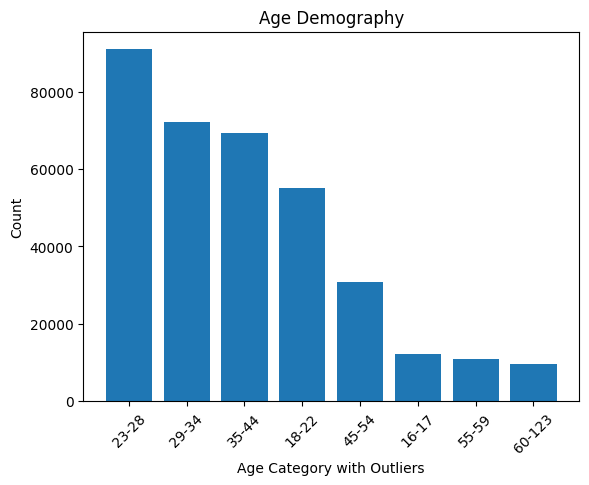

In [ ]:
# Define the bins for age categories
bins = [16, 18, 23, 29, 35, 45, 55, 60, 123]

# Define the labels for age categories
labels = ['16-17', '18-22', '23-28', '29-34', '35-44', '45-54', '55-59', '60-123']

# Bin the ages into categories
off_peak_schedule_attendance['age_category'] = pd.cut(off_peak_schedule_attendance['age'], bins=bins, labels=labels, right=False)

# Count the occurrences of each age category
age_category_counts = off_peak_schedule_attendance['age_category'].value_counts()

# Plot the age demography to view outliers quantity
plt.bar(age_category_counts.index, age_category_counts.values)
plt.xlabel('Age Category with Outliers')
plt.ylabel('Count')
plt.title('Age Demography')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
# Save the plot as a PNG file with the plot title
plt.savefig('Age Demography with Outliers.png')
plt.show()

In [ ]:
# Remove outliers
off_peak_schedule_attendance = off_peak_schedule_attendance[(off_peak_schedule_attendance['age'] >= lower_bound
                                                          ) & (off_peak_schedule_attendance['age'] <= upper_bound)]

In [ ]:
# Set default value for MF_1, MF_2, MF_3, and MF_4 columns as FALSE
off_peak_schedule_attendance.loc[:, 'MF_1'] = False
off_peak_schedule_attendance.loc[:, 'MF_2'] = False
off_peak_schedule_attendance.loc[:, 'MF_3'] = False
off_peak_schedule_attendance.loc[:, 'MF_4'] = False

# Iterate over rows where 'is_weekend' column is FALSE
for index, row in off_peak_schedule_attendance[off_peak_schedule_attendance['is_weekend'] == False].iterrows():
    center_id = row['center_id']
    check_in_time = row['check_in_time']

    # Gym with center_id 264
    if center_id == '264':
        # Update MF_1 if check_in_time >= 00:00 and < 16:00
        if check_in_time >= datetime.time(0, 0) and check_in_time < datetime.time(16, 0):
            off_peak_schedule_attendance.loc[index, 'MF_1'] = True
        # Update MF_2 if check_in_time >= 21:00
        if check_in_time >= datetime.time(21, 0):
            off_peak_schedule_attendance.loc[index, 'MF_2'] = True

    # Gym with center_id 174
    elif center_id == '174':
        # Update MF_1 if check_in_time >= 00:00 and < 13:30
        if check_in_time >= datetime.time(0, 0) and check_in_time < datetime.time(13, 30):
            off_peak_schedule_attendance.loc[index, 'MF_1'] = True
        # Update MF_2 if check_in_time >= 20:30
        if check_in_time >= datetime.time(20, 30):
            off_peak_schedule_attendance.loc[index, 'MF_2'] = True

    # Gym with center_id 168
    elif center_id == '168':
        # Update MF_1 if check_in_time >= 00:00 and < 06:00
        if check_in_time >= datetime.time(0, 0) and check_in_time < datetime.time(6, 0):
            off_peak_schedule_attendance.loc[index, 'MF_1'] = True
        # Update MF_2 if check_in_time >= 08:30 and < 11:30
        if check_in_time >= datetime.time(8, 30) and check_in_time < datetime.time(11, 30):
            off_peak_schedule_attendance.loc[index, 'MF_2'] = True
        # Update MF_3 if check_in_time >= 13:30 and < 16:00
        if check_in_time >= datetime.time(13, 30) and check_in_time < datetime.time(16, 0):
            off_peak_schedule_attendance.loc[index, 'MF_3'] = True
        # Update MF_4 if check_in_time >= 21:00
        if check_in_time >= datetime.time(21, 0):
            off_peak_schedule_attendance.loc[index, 'MF_4'] = True

# Display the updated dataframe
off_peak_schedule_attendance

,visit_key,center_id,check_in_result,gender,age,product_group,check_in_date,check_out_date,is_weekend,check_in_time,...,offpeak_MF_3_OPEN,offpeak_MF_3_CLOSE,offpeak_MF_4_OPEN,offpeak_MF_4_CLOSE,combined_offpeak_mask,age_category,MF_1,MF_2,MF_3,MF_4
0,9aad68bf43137ca99ebf646bf83f6093760571d4acb966...,168,ACCESS_GRANTED,MALE,41,MULTI GYM,2023-07-01,2023-07-01,True,13:02:47,...,13:30:00,16:00:00,21:00:00,00:00:00,True,35-44,False,False,False,False
1,6b31f596c1b22d4124bfe72a2a452d59819ed3c937485f...,168,ACCESS_GRANTED,FEMALE,28,CORE,2023-06-26,2023-06-26,False,13:35:57,...,13:30:00,16:00:00,21:00:00,00:00:00,True,23-28,False,False,True,False
2,c983d9bef7cf217dbda613454d9d6832bce4176e65ac2f...,168,ACCESS_GRANTED,FEMALE,27,CORE,2022-09-13,2022-09-14,False,23:00:56,...,13:30:00,16:00:00,21:00:00,00:00:00,True,23-28,False,False,False,True
3,02b2df1f7b25046f2ce046704c808eff2a3bf873b3508a...,168,ACCESS_GRANTED,FEMALE,27,CORE,2023-05-08,2023-05-08,False,13:44:10,...,13:30:00,16:00:00,21:00:00,00:00:00,True,23-28,False,False,True,False
4,db4d954ff6a26a7068543c101df3960282453709f172b0...,168,ACCESS_GRANTED,FEMALE,28,CORE,2023-07-08,2023-07-08,True,11:34:44,...,13:30:00,16:00:00,21:00:00,00:00:00,True,23-28,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356531,040ff59a34efea9242fa52c020b1a13fca78ddecbcb839...,174,ACCESS_GRANTED,MALE,37,CORE,2023-06-25,2023-06-25,True,10:13:27,...,13:30:00,16:00:00,09:00:00,00:00:00,True,35-44,False,False,False,False
356532,9d6715679ed44d288ce10e33f8fd0e781caa0a200209f2...,174,ACCESS_GRANTED,MALE,37,CORE,2023-08-27,2023-08-27,True,10:35:21,...,13:30:00,16:00:00,09:00:00,00:00:00,True,35-44,False,False,False,False
356533,0f4d6549531ff8d43fff435052d98c7be191e9be0cd229...,174,ACCESS_GRANTED,FEMALE,32,OFF PEAK,2023-08-28,2023-08-28,False,08:53:06,...,13:30:00,16:00:00,09:00:00,00:00:00,True,29-34,True,False,False,False
356534,351c7f74e7d0d0d8602f2cee2925f093dd5d3829b7b019...,174,ACCESS_GRANTED,FEMALE,32,OFF PEAK,2023-08-20,2023-08-20,True,17:05:10,...,13:30:00,16:00:00,09:00:00,00:00:00,True,29-34,False,False,False,False


In [ ]:
# Display DataFrame information
off_peak_schedule_attendance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 341290 entries, 0 to 356535
Data columns (total 39 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   visit_key                            341290 non-null  object        
 1   center_id                            341290 non-null  object        
 2   check_in_result                      341290 non-null  object        
 3   gender                               341290 non-null  object        
 4   age                                  341290 non-null  int64         
 5   product_group                        341290 non-null  object        
 6   check_in_date                        341290 non-null  datetime64[ns]
 7   check_out_date                       341290 non-null  datetime64[ns]
 8   is_weekend                           341290 non-null  bool          
 9   check_in_time                        341290 non-null  object        
 10  c

In [ ]:
#Save CSV copy of off_peak_schedule_attendance
off_peak_schedule_attendance.to_csv('off_peak_schedule_attendance.csv', index=False)

## Question 1. Identify Schedule attendance across each membership group(Core, Multi-gym, Plus, Off-Peak)

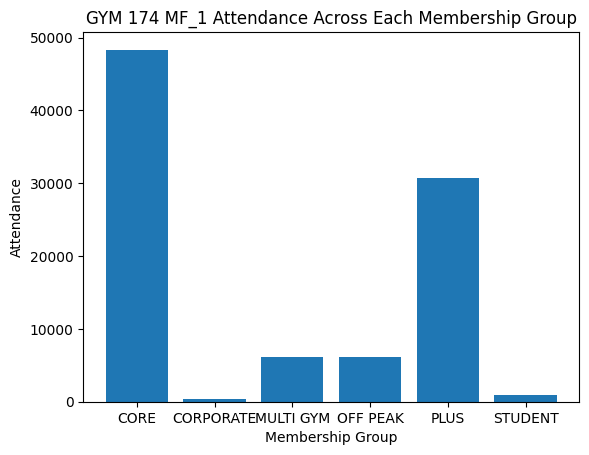

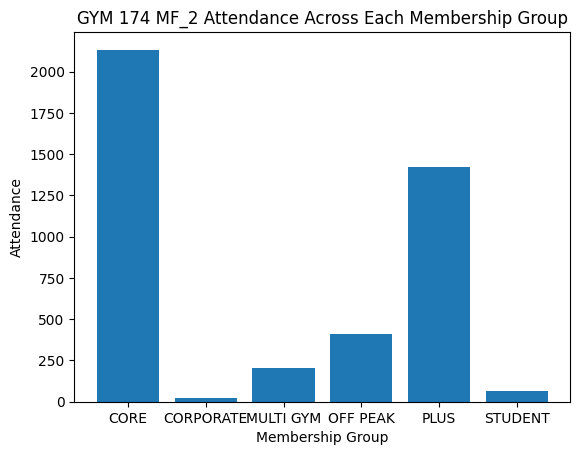

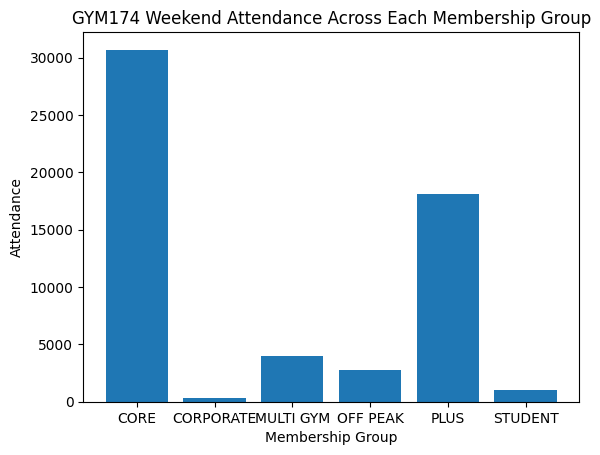

In [ ]:
def plot_attendance(off_peak_schedule_attendance, center_id, is_weekend, MF, title):
    # Filter rows based on parameters
    if MF:
        filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == center_id) &
                                                     (off_peak_schedule_attendance['is_weekend'] == is_weekend) &
                                                     (off_peak_schedule_attendance[MF] == True)]
    else:
        filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == center_id) &
                                                     (off_peak_schedule_attendance['is_weekend'] == is_weekend)]

    # Group by product_group and count occurrences
    grouped_data = filtered_data.groupby('product_group').size()

    # Plot the attendance across each membership group
    plt.bar(grouped_data.index, grouped_data.values)
    plt.xlabel('Membership Group')
    plt.ylabel('Attendance')
    plt.title(title)

    # Save the plot as PNG with title
    plt.savefig(f"{title.replace(' ', '_').lower()}.png")

    # Show the plot
    plt.show()

# Display and save plots
plot_attendance(off_peak_schedule_attendance, '174', False, 'MF_1', 'GYM 174 MF_1 Attendance Across Each Membership Group')
plot_attendance(off_peak_schedule_attendance, '174', False, 'MF_2', 'GYM 174 MF_2 Attendance Across Each Membership Group')
plot_attendance(off_peak_schedule_attendance, '174', True, None, 'GYM174 Weekend Attendance Across Each Membership Group')

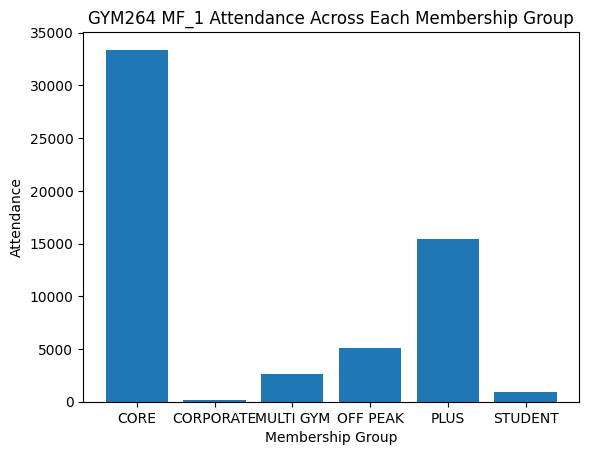

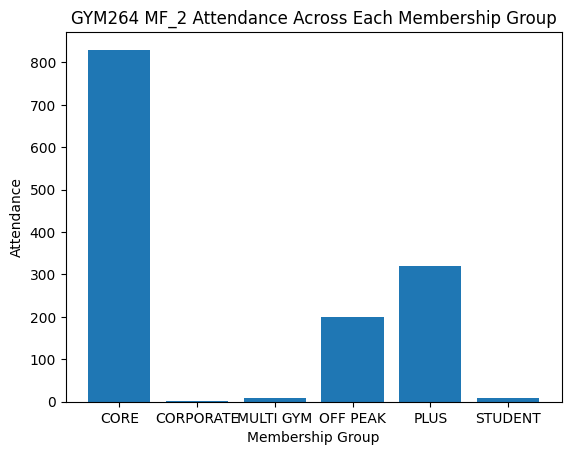

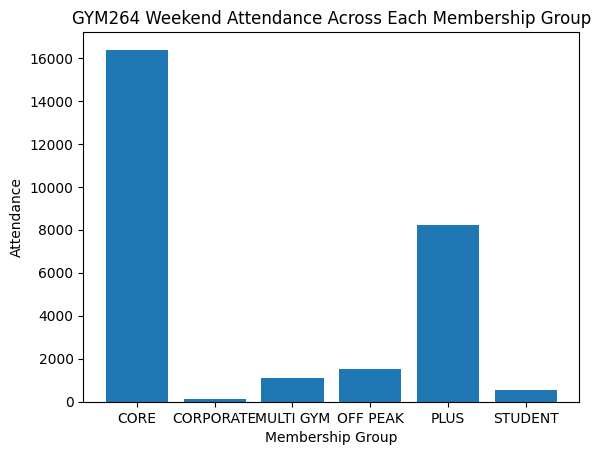

In [ ]:
#Plot the attendance in MF_1, MF_2 and weekend Schedule for Gym 264

def plot_attendance(off_peak_schedule_attendance, center_id, is_weekend, MF, title):
    # Filter rows based on parameters
    if MF:
        filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == center_id) &
                                                     (off_peak_schedule_attendance['is_weekend'] == is_weekend) &
                                                     (off_peak_schedule_attendance[MF] == True)]
    else:
        filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == center_id) &
                                                     (off_peak_schedule_attendance['is_weekend'] == is_weekend)]

    # Group by product_group and count occurrences
    grouped_data = filtered_data.groupby('product_group').size()

    # Plot the attendance across each membership group
    plt.bar(grouped_data.index, grouped_data.values)
    plt.xlabel('Membership Group')
    plt.ylabel('Attendance')
    plt.title(title)

    # Save the plot as PNG with title
    plt.savefig(f"{title.replace(' ', '_').lower()}.png")

    plt.show()

# view plot outputs
plot_attendance(off_peak_schedule_attendance, '264', False, 'MF_1', 'GYM264 MF_1 Attendance Across Each Membership Group')
plot_attendance(off_peak_schedule_attendance, '264', False, 'MF_2', 'GYM264 MF_2 Attendance Across Each Membership Group')
plot_attendance(off_peak_schedule_attendance, '264', True, None, 'GYM264 Weekend Attendance Across Each Membership Group')

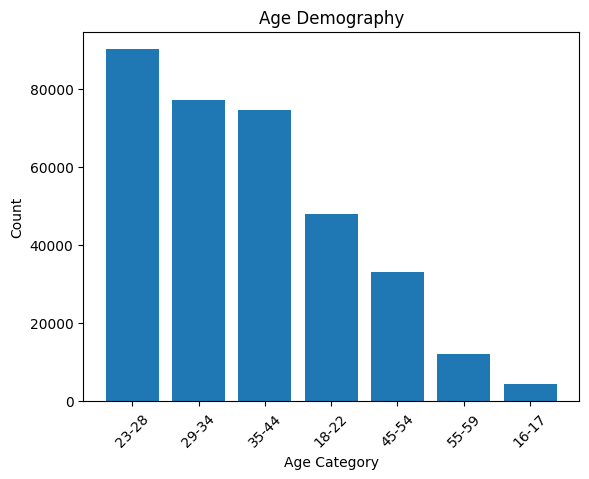

In [ ]:
# Define the bins for age categories
bins = [15, 17, 22, 28, 34, 44, 54, 59]

# Define the labels for age categories
labels = ['16-17', '18-22', '23-28', '29-34', '35-44', '45-54', '55-59']

# Bin the ages into categories using .loc to avoid SettingWithCopyWarning
off_peak_schedule_attendance.loc[:, 'age_category'] = pd.cut(off_peak_schedule_attendance['age'], bins=bins, labels=labels, right=False)

# Count the occurrences of each age category
age_category_counts = off_peak_schedule_attendance['age_category'].value_counts()

# Plot the age demography
plt.bar(age_category_counts.index, age_category_counts.values)
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Age Demography')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
# Save the plot as PNG with title
plt.savefig('Age Demography.png')
plt.show()

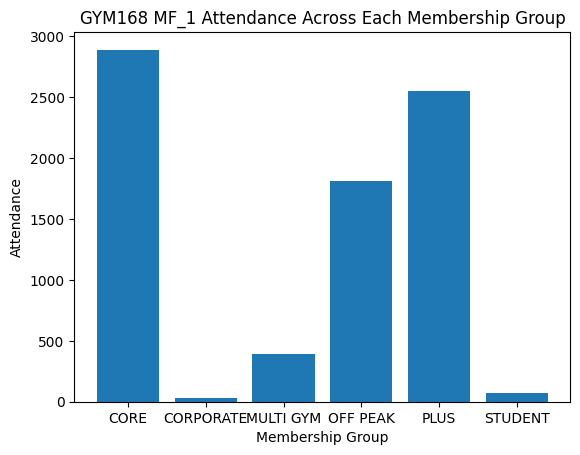

In [ ]:
# Filter rows where center_id is '168', is_weekend is FALSE, and MF_1 is TRUE
filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == '168') &
                                             (off_peak_schedule_attendance['is_weekend'] == False) &
                                             (off_peak_schedule_attendance['MF_1'] == True)]

# Group by product_group and count the occurrences
grouped_data = filtered_data.groupby('product_group').size()

# Plot the attendance across each membership group
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Membership Group')
plt.ylabel('Attendance')
plt.title('GYM168 MF_1 Attendance Across Each Membership Group')
plt.savefig('GYM168 MF_1 Attendance Across Each Membership Group.png')
plt.show()

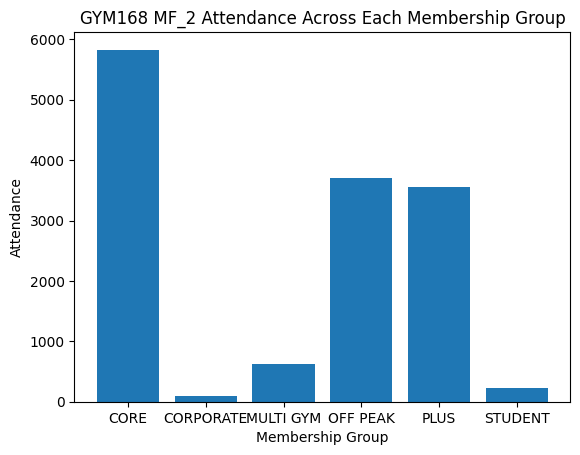

In [ ]:
# Filter rows where center_id is '168', is_weekend is FALSE, and MF_2 is TRUE
filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == '168') &
                                             (off_peak_schedule_attendance['is_weekend'] == False) &
                                             (off_peak_schedule_attendance['MF_2'] == True)]

# Group by product_group and count the occurrences
grouped_data = filtered_data.groupby('product_group').size()

# Plot the attendance across each membership group
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Membership Group')
plt.ylabel('Attendance')
plt.title('GYM168 MF_2 Attendance Across Each Membership Group')
plt.savefig('GYM168 MF_2 Attendance Across Each Membership Group.png')
plt.show()

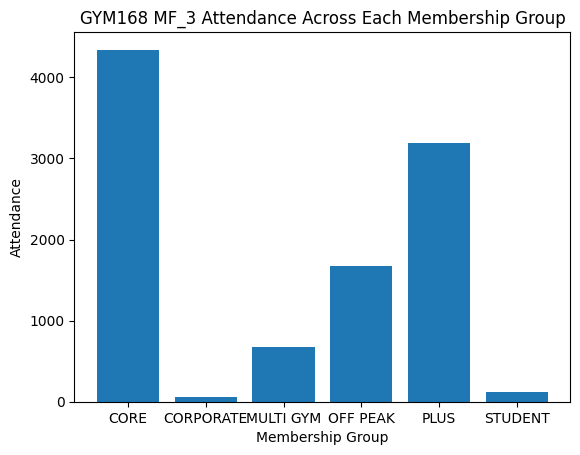

In [ ]:
# Filter rows where center_id is '168', is_weekend is FALSE, and MF_3 is TRUE
filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == '168') &
                                             (off_peak_schedule_attendance['is_weekend'] == False) &
                                             (off_peak_schedule_attendance['MF_3'] == True)]

# Group by product_group and count the occurrences
grouped_data = filtered_data.groupby('product_group').size()

# Plot the attendance across each membership group
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Membership Group')
plt.ylabel('Attendance')
plt.title('GYM168 MF_3 Attendance Across Each Membership Group')
plt.savefig('GYM168 MF_3 Attendance Across Each Membership Group.png')
plt.show()

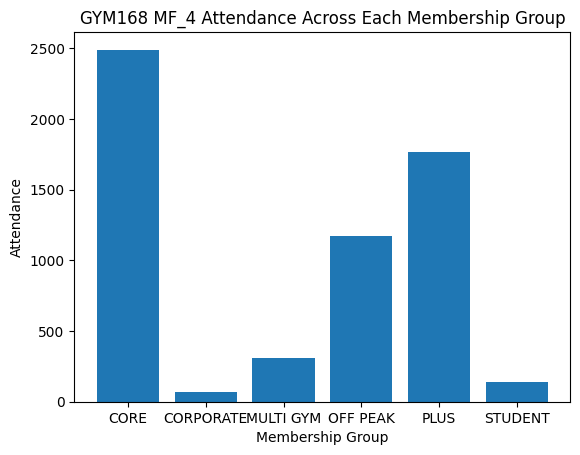

In [ ]:
# Filter rows where center_id is '168', is_weekend is FALSE, and MF_4 is TRUE
filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == '168') &
                                             (off_peak_schedule_attendance['is_weekend'] == False) &
                                             (off_peak_schedule_attendance['MF_4'] == True)]

# Group by product_group and count the occurrences
grouped_data = filtered_data.groupby('product_group').size()

# Plot the attendance across each membership group
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Membership Group')
plt.ylabel('Attendance')
plt.title('GYM168 MF_4 Attendance Across Each Membership Group')
plt.savefig('GYM168 MF_4 Attendance Across Each Membership Group.png')
plt.show()

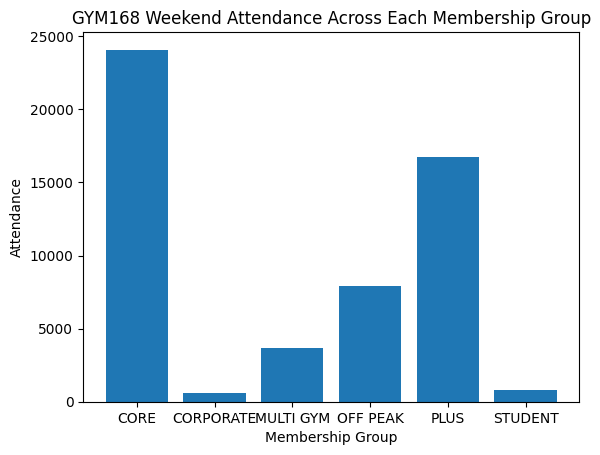

In [ ]:
# Filter rows where center_id is '168', is_weekend is TRUE
filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == '168') &
                                             (off_peak_schedule_attendance['is_weekend'] == True)]

# Group by product_group and count the occurrences
grouped_data = filtered_data.groupby('product_group').size()

# Plot the attendance across each membership group
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Membership Group')
plt.ylabel('Attendance')
plt.title('GYM168 Weekend Attendance Across Each Membership Group')
plt.savefig('GYM168 Weekend Attendance Across Each Membership Group.png')
plt.show()

## Question 2. Get schedule demographic attendance across each product level

***2a. Explore Gender attendance***

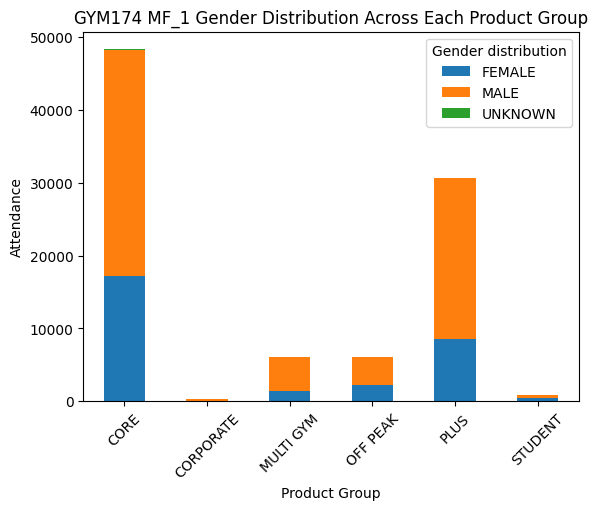

In [ ]:
def plot_demographic_attendance(off_peak_schedule_attendance, center_id, is_weekend, MF):
    # Filter the DataFrame based on conditions
    filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == center_id) &
                                                 (off_peak_schedule_attendance['is_weekend'] == is_weekend) &
                                                 (off_peak_schedule_attendance[MF] == True)]

    # Group by product_group and gender, and count the occurrences
    grouped_data = filtered_data.groupby(['product_group', 'gender']).size().unstack()

    # Plot the gender distribution for each product group
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel('Product Group')
    plt.ylabel('Attendance')
    plt.title('GYM174 MF_1 Gender Distribution Across Each Product Group')
    plt.xticks(rotation=45)
    plt.legend(title='Gender distribution')
    plt.savefig('GYM174 MF_1 Gender Distribution Across Each Product Group.png')
    plt.show()

# view plot
plot_demographic_attendance(off_peak_schedule_attendance, '174', False, 'MF_1')

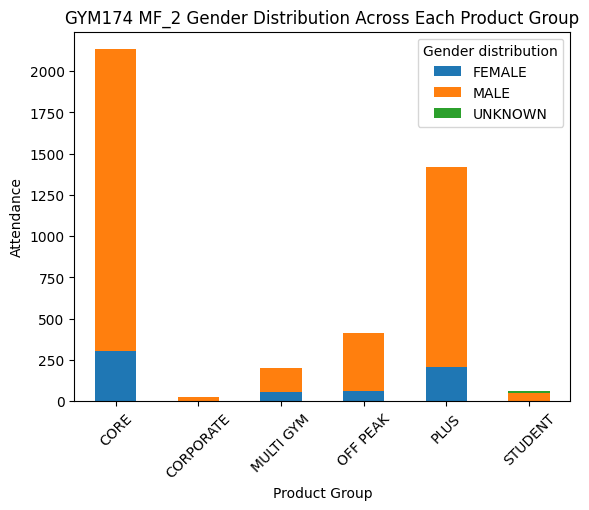

In [ ]:
def plot_demographic_attendance(off_peak_schedule_attendance, center_id, is_weekend, MF):
    # Filter the DataFrame based on conditions
    filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == center_id) &
                                                 (off_peak_schedule_attendance['is_weekend'] == is_weekend) &
                                                 (off_peak_schedule_attendance[MF] == True)]

    # Group by product_group and gender, and count the occurrences
    grouped_data = filtered_data.groupby(['product_group', 'gender']).size().unstack()

    # Plot the gender distribution for each product group
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel('Product Group')
    plt.ylabel('Attendance')
    plt.title('GYM174 MF_2 Gender Distribution Across Each Product Group')
    plt.xticks(rotation=45)
    plt.legend(title='Gender distribution')
    plt.savefig('GYM174 MF_2 Gender Distribution Across Each Product Group.png')
    plt.show()

#  view plot
plot_demographic_attendance(off_peak_schedule_attendance, '174', False, 'MF_2')

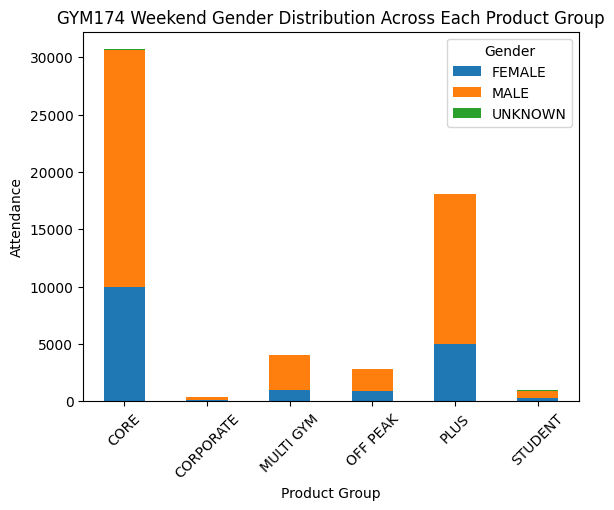

In [ ]:
def plot_gender_distribution(off_peak_schedule_attendance, center_id, is_weekend):
    # Filter the DataFrame based on conditions
    filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == center_id) &
                                                 (off_peak_schedule_attendance['is_weekend'] == is_weekend)]

    # Group by product_group and gender, and count the occurrences
    grouped_data = filtered_data.groupby(['product_group', 'gender']).size().unstack()

    # Plot the gender distribution for each product group
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel('Product Group')
    plt.ylabel('Attendance')
    plt.title('GYM174 Weekend Gender Distribution Across Each Product Group')
    plt.xticks(rotation=45)
    plt.legend(title='Gender')
    plt.savefig('GYM174 Weekend Gender Distribution Across Each Product Group.png')
    plt.show()

#  view plot
plot_gender_distribution(off_peak_schedule_attendance, '174', True)

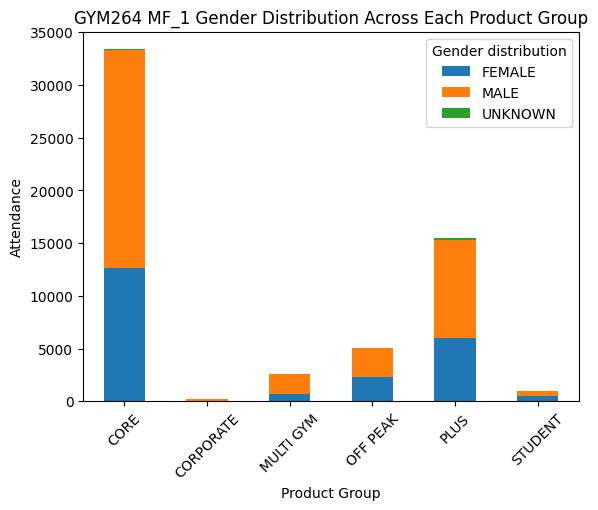

In [ ]:
def plot_demographic_attendance(off_peak_schedule_attendance, center_id, is_weekend, MF):
    # Filter the DataFrame based on conditions
    filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == center_id) &
                                                 (off_peak_schedule_attendance['is_weekend'] == is_weekend) &
                                                 (off_peak_schedule_attendance[MF] == True)]

    # Group by product_group and gender, and count the occurrences
    grouped_data = filtered_data.groupby(['product_group', 'gender']).size().unstack()

    # Plot the gender distribution for each product group
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel('Product Group')
    plt.ylabel('Attendance')
    plt.title('GYM264 MF_1 Gender Distribution Across Each Product Group')
    plt.xticks(rotation=45)
    plt.legend(title='Gender distribution')
    plt.savefig('GYM264 MF_1 Gender Distribution Across Each Product Group.png')
    plt.show()

#  view plot
plot_demographic_attendance(off_peak_schedule_attendance, '264', False, 'MF_1')

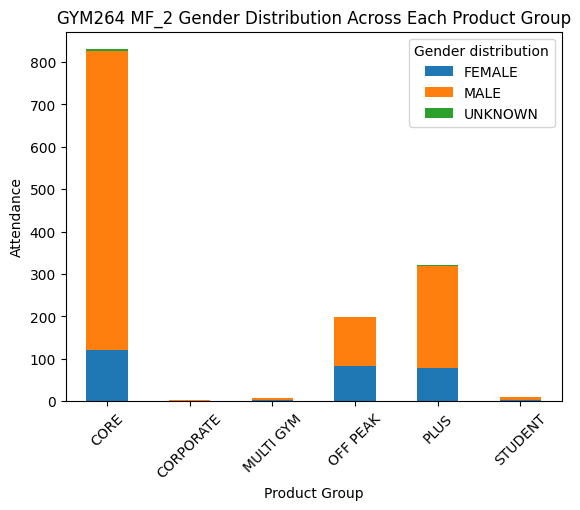

In [ ]:
def plot_demographic_attendance(off_peak_schedule_attendance, center_id, is_weekend, MF):
    # Filter the DataFrame based on conditions
    filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == center_id) &
                                                 (off_peak_schedule_attendance['is_weekend'] == is_weekend) &
                                                 (off_peak_schedule_attendance[MF] == True)]

    # Group by product_group and gender, and count the occurrences
    grouped_data = filtered_data.groupby(['product_group', 'gender']).size().unstack()

    # Plot the gender distribution for each product group
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel('Product Group')
    plt.ylabel('Attendance')
    plt.title('GYM264 MF_2 Gender Distribution Across Each Product Group')
    plt.xticks(rotation=45)
    plt.legend(title='Gender distribution')
    plt.savefig('GYM264 MF_2 Gender Distribution Across Each Product Group.png')
    plt.show()

#  view plot
plot_demographic_attendance(off_peak_schedule_attendance, '264', False, 'MF_2')

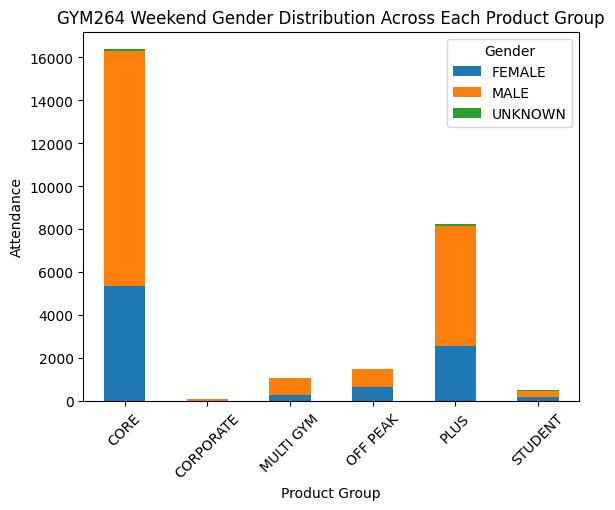

In [ ]:
def plot_gender_distribution(off_peak_schedule_attendance, center_id, is_weekend):
    # Filter the DataFrame based on conditions
    filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == center_id) &
                                                 (off_peak_schedule_attendance['is_weekend'] == is_weekend)]

    # Group by product_group and gender, and count the occurrences
    grouped_data = filtered_data.groupby(['product_group', 'gender']).size().unstack()

    # Plot the gender distribution for each product group
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel('Product Group')
    plt.ylabel('Attendance')
    plt.title('GYM264 Weekend Gender Distribution Across Each Product Group')
    plt.xticks(rotation=45)
    plt.legend(title='Gender')
    plt.savefig('GYM264 Weekend Gender Distribution Across Each Product Group.png')
    plt.show()

#  view plot
plot_gender_distribution(off_peak_schedule_attendance, '264', True)

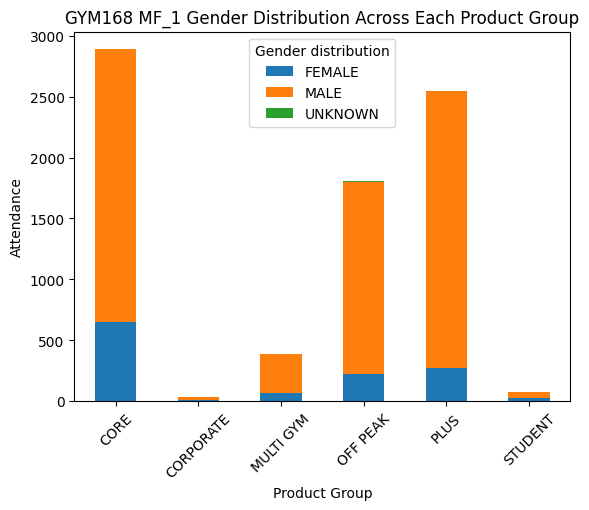

In [ ]:
def plot_demographic_attendance(off_peak_schedule_attendance, center_id, is_weekend, MF):
    # Filter the DataFrame based on conditions
    filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == center_id) &
                                                 (off_peak_schedule_attendance['is_weekend'] == is_weekend) &
                                                 (off_peak_schedule_attendance[MF] == True)]

    # Group by product_group and gender, and count the occurrences
    grouped_data = filtered_data.groupby(['product_group', 'gender']).size().unstack()

    # Plot the gender distribution for each product group
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel('Product Group')
    plt.ylabel('Attendance')
    plt.title('GYM168 MF_1 Gender Distribution Across Each Product Group')
    plt.xticks(rotation=45)
    plt.legend(title='Gender distribution')
    plt.savefig('GYM168 MF_1 Gender Distribution Across Each Product Group.png')
    plt.show()

#  view plot
plot_demographic_attendance(off_peak_schedule_attendance, '168', False, 'MF_1')

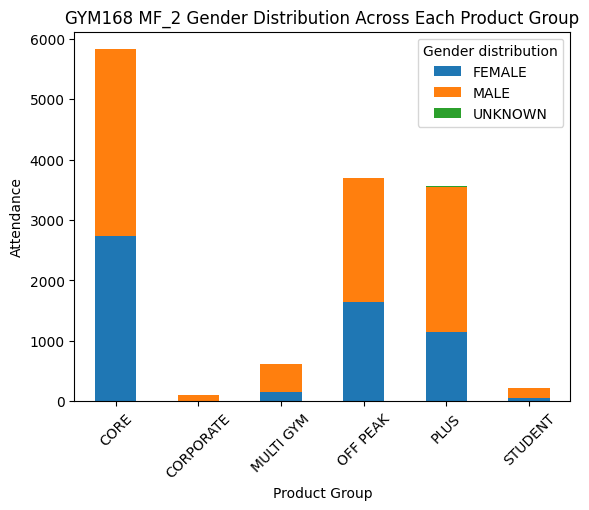

In [ ]:
def plot_demographic_attendance(off_peak_schedule_attendance, center_id, is_weekend, MF):
    # Filter the DataFrame based on conditions
    filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == center_id) &
                                                 (off_peak_schedule_attendance['is_weekend'] == is_weekend) &
                                                 (off_peak_schedule_attendance[MF] == True)]

    # Group by product_group and gender, and count the occurrences
    grouped_data = filtered_data.groupby(['product_group', 'gender']).size().unstack()

    # Plot the gender distribution for each product group
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel('Product Group')
    plt.ylabel('Attendance')
    plt.title('GYM168 MF_2 Gender Distribution Across Each Product Group')
    plt.xticks(rotation=45)
    plt.legend(title='Gender distribution')
    plt.savefig('GYM168 MF_2 Gender Distribution Across Each Product Group.png')
    plt.show()

# view plot
plot_demographic_attendance(off_peak_schedule_attendance, '168', False, 'MF_2')

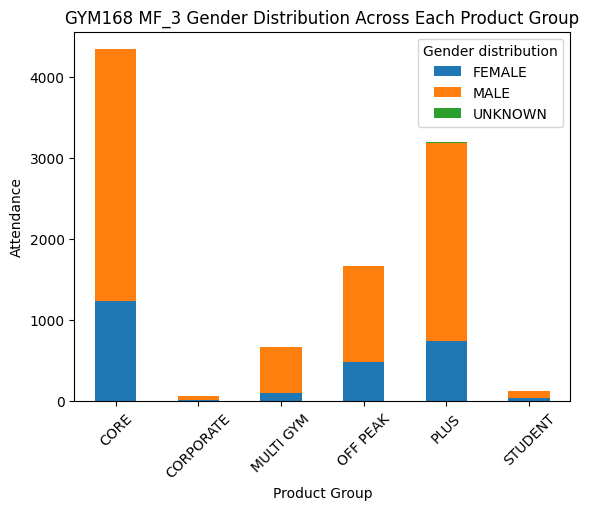

In [ ]:
def plot_demographic_attendance(off_peak_schedule_attendance, center_id, is_weekend, MF):
    # Filter the DataFrame based on conditions
    filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == center_id) &
                                                 (off_peak_schedule_attendance['is_weekend'] == is_weekend) &
                                                 (off_peak_schedule_attendance[MF] == True)]

    # Group by product_group and gender, and count the occurrences
    grouped_data = filtered_data.groupby(['product_group', 'gender']).size().unstack()

    # Plot the gender distribution for each product group
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel('Product Group')
    plt.ylabel('Attendance')
    plt.title('GYM168 MF_3 Gender Distribution Across Each Product Group')
    plt.xticks(rotation=45)
    plt.legend(title='Gender distribution')
    plt.savefig('GYM168 MF_3 Gender Distribution Across Each Product Group.png')
    plt.show()

#  view plot
plot_demographic_attendance(off_peak_schedule_attendance, '168', False, 'MF_3')

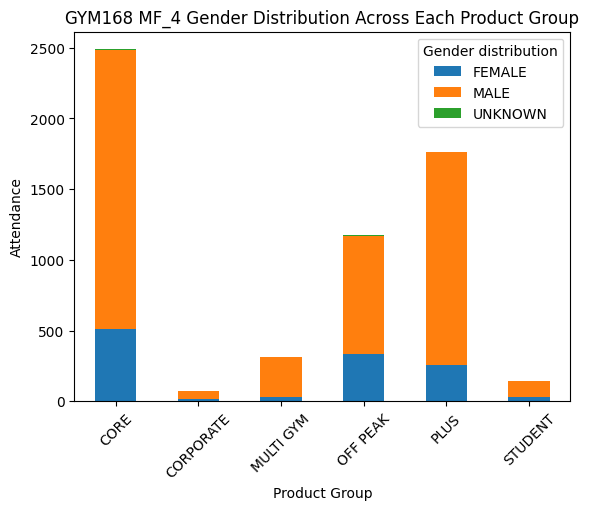

In [ ]:
def plot_demographic_attendance(off_peak_schedule_attendance, center_id, is_weekend, MF):
    # Filter the DataFrame based on conditions
    filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == center_id) &
                                                 (off_peak_schedule_attendance['is_weekend'] == is_weekend) &
                                                 (off_peak_schedule_attendance[MF] == True)]

    # Group by product_group and gender, and count the occurrences
    grouped_data = filtered_data.groupby(['product_group', 'gender']).size().unstack()

    # Plot the gender distribution for each product group
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel('Product Group')
    plt.ylabel('Attendance')
    plt.title('GYM168 MF_4 Gender Distribution Across Each Product Group')
    plt.xticks(rotation=45)
    plt.legend(title='Gender distribution')
    plt.savefig('GYM168 MF_4 Gender Distribution Across Each Product Group.png')
    plt.show()

#  view plot
plot_demographic_attendance(off_peak_schedule_attendance, '168', False, 'MF_4')

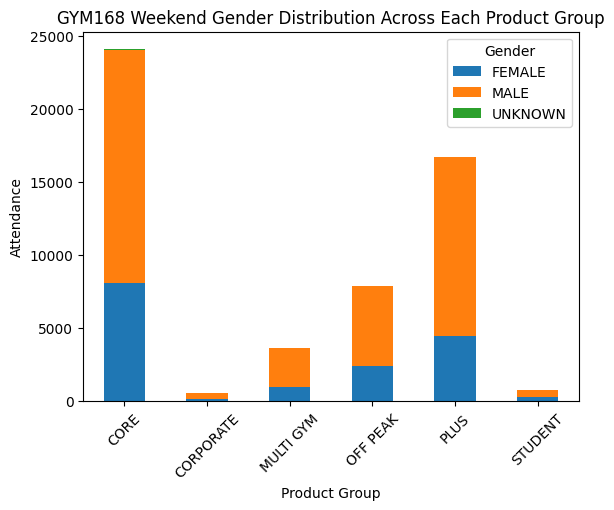

In [ ]:
def plot_gender_distribution(off_peak_schedule_attendance, center_id, is_weekend):
    # Filter the DataFrame based on conditions
    filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == center_id) &
                                                 (off_peak_schedule_attendance['is_weekend'] == is_weekend)]

    # Group by product_group and gender, and count the occurrences
    grouped_data = filtered_data.groupby(['product_group', 'gender']).size().unstack()

    # Plot the gender distribution for each product group
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel('Product Group')
    plt.ylabel('Attendance')
    plt.title('GYM168 Weekend Gender Distribution Across Each Product Group')
    plt.xticks(rotation=45)
    plt.legend(title='Gender')
    plt.savefig('GYM168 Weekend Gender Distribution Across Each Product Group.png')
    plt.show()

#  view plot
plot_gender_distribution(off_peak_schedule_attendance, '168', True)

***2b. Explore Age attendance***

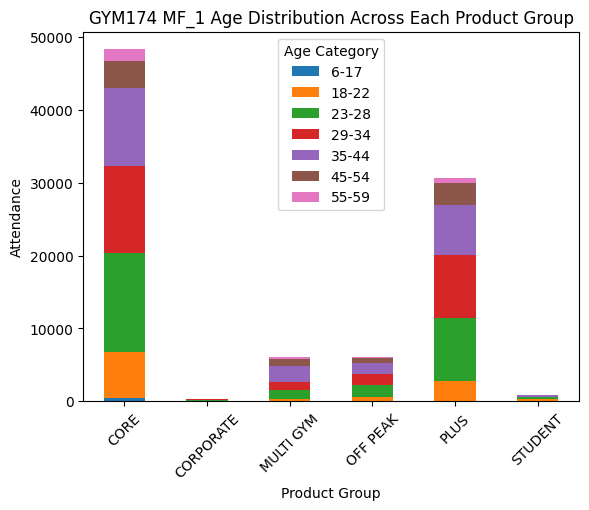

In [ ]:
# Define the age bins
bins = [6, 18, 23, 29, 35, 45, 55, 60]
labels = ['6-17', '18-22', '23-28', '29-34', '35-44', '45-54', '55-59']

def plot_age_distribution(off_peak_schedule_attendance, center_id, is_weekend):
    # Filter the DataFrame based on conditions
    filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == center_id) &
                                                 (off_peak_schedule_attendance['is_weekend'] == is_weekend) &
                                                 (off_peak_schedule_attendance['MF_1'] == True)].copy()  # Create a copy to avoid SettingWithCopyWarning

    # Bin the ages into categories
    filtered_data.loc[:, 'age_category'] = pd.cut(filtered_data['age'], bins=bins, labels=labels, right=False)

    # Group by product_group and age_category, and count the occurrences
    grouped_data = filtered_data.groupby(['product_group', 'age_category'], observed=True).size().unstack(fill_value=0)

    # Plot the age distribution for each product group
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel('Product Group')
    plt.ylabel('Attendance')
    plt.title('GYM174 MF_1 Age Distribution Across Each Product Group')
    plt.xticks(rotation=45)
    plt.legend(title='Age Category')
    plt.savefig('GYM174 MF_1 Age Distribution Across Each Product Group.png')
    plt.show()

# Veiw plot
plot_age_distribution(off_peak_schedule_attendance, '174', False)


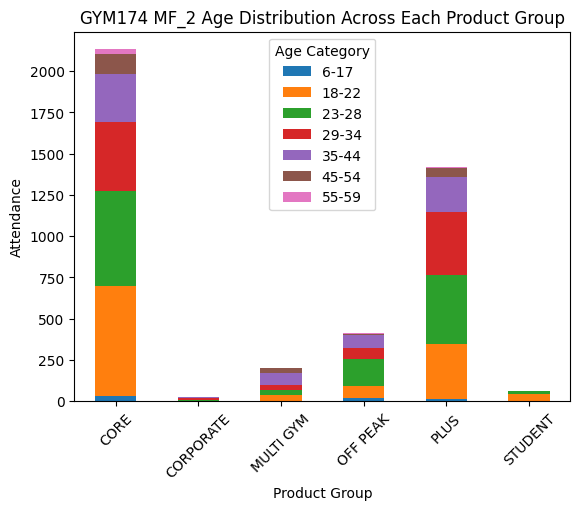

In [ ]:
# Define the age bins
bins = [6, 18, 23, 29, 35, 45, 55, 60]
labels = ['6-17', '18-22', '23-28', '29-34', '35-44', '45-54', '55-59']

def plot_age_distribution(off_peak_schedule_attendance, center_id, is_weekend):
    # Filter the DataFrame based on conditions
    filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == center_id) &
                                                 (off_peak_schedule_attendance['is_weekend'] == is_weekend) &
                                                 (off_peak_schedule_attendance['MF_2'] == True)].copy()  # Create a copy to avoid SettingWithCopyWarning

    # Bin the ages into categories
    filtered_data.loc[:, 'age_category'] = pd.cut(filtered_data['age'], bins=bins, labels=labels, right=False)

    # Group by product_group and age_category, and count the occurrences
    grouped_data = filtered_data.groupby(['product_group', 'age_category'], observed=True).size().unstack(fill_value=0)

    # Plot the age distribution for each product group
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel('Product Group')
    plt.ylabel('Attendance')
    plt.title('GYM174 MF_2 Age Distribution Across Each Product Group')
    plt.xticks(rotation=45)
    plt.legend(title='Age Category')
    plt.savefig('GYM174 MF_2 Age Distribution Across Each Product Group.png')
    plt.show()

# View plot
plot_age_distribution(off_peak_schedule_attendance, '174', False)

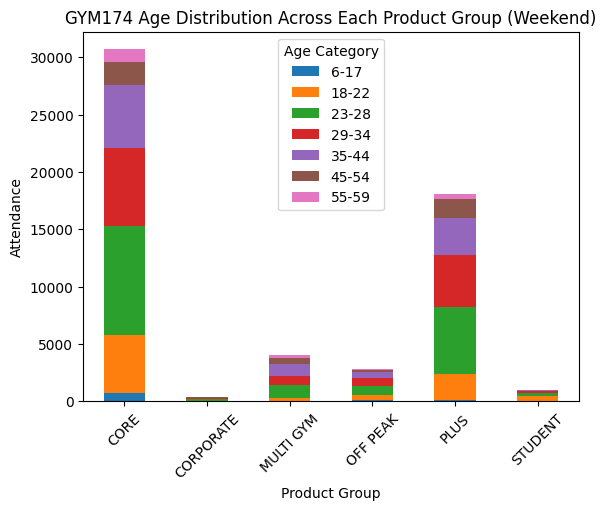

In [ ]:
# Define the age bins
bins = [6, 18, 23, 29, 35, 45, 55, 60]
labels = ['6-17', '18-22', '23-28', '29-34', '35-44', '45-54', '55-59']

def plot_age_distribution(off_peak_schedule_attendance):
    # Filter the DataFrame based on conditions
    filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == '174') &
                                                 (off_peak_schedule_attendance['is_weekend'] == True)].copy()  # Create a copy to avoid SettingWithCopyWarning

    # Bin the ages into categories
    filtered_data.loc[:, 'age_category'] = pd.cut(filtered_data['age'], bins=bins, labels=labels, right=False)

    # Group by product_group and age_category, and count the occurrences
    grouped_data = filtered_data.groupby(['product_group', 'age_category'], observed=False).size().unstack(fill_value=0)

    # Plot the age distribution for each product group
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel('Product Group')
    plt.ylabel('Attendance')
    plt.title('GYM174 Age Distribution Across Each Product Group (Weekend)')
    plt.xticks(rotation=45)
    plt.legend(title='Age Category')
    plt.savefig('GYM174 Age Distribution Across Each Product Group (Weekend).png')
    plt.show()

# View plot
plot_age_distribution(off_peak_schedule_attendance)

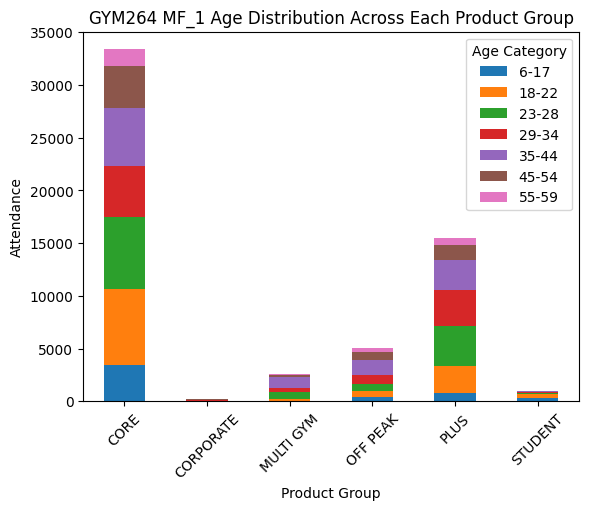

In [ ]:
# Define the age bins
bins = [6, 18, 23, 29, 35, 45, 55, 60]
labels = ['6-17', '18-22', '23-28', '29-34', '35-44', '45-54', '55-59']

def plot_age_distribution(off_peak_schedule_attendance, center_id, is_weekend):
    # Filter the DataFrame based on conditions
    filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == center_id) &
                                                 (off_peak_schedule_attendance['is_weekend'] == is_weekend) &
                                                 (off_peak_schedule_attendance['MF_1'] == True)].copy()  # Create a copy to avoid SettingWithCopyWarning

    # Bin the ages into categories
    filtered_data.loc[:, 'age_category'] = pd.cut(filtered_data['age'], bins=bins, labels=labels, right=False)

    # Group by product_group and age_category, and count the occurrences
    grouped_data = filtered_data.groupby(['product_group', 'age_category'], observed=True).size().unstack(fill_value=0)

    # Plot the age distribution for each product group
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel('Product Group')
    plt.ylabel('Attendance')
    plt.title('GYM264 MF_1 Age Distribution Across Each Product Group')
    plt.xticks(rotation=45)
    plt.legend(title='Age Category')
    plt.savefig('GYM2644 MF_1 Age Distribution Across Each Product Group.png')
    plt.show()

# View plot
plot_age_distribution(off_peak_schedule_attendance, '264', False)

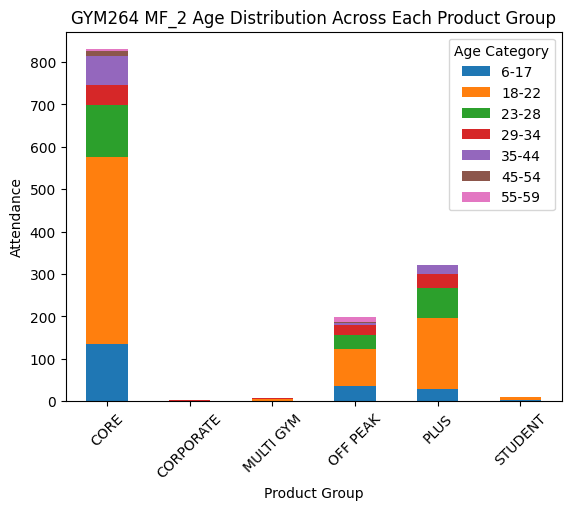

In [ ]:
# Define the age bins
bins = [6, 18, 23, 29, 35, 45, 55, 60]
labels = ['6-17', '18-22', '23-28', '29-34', '35-44', '45-54', '55-59']

def plot_age_distribution(off_peak_schedule_attendance, center_id, is_weekend):
    # Filter the DataFrame based on conditions
    filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == center_id) &
                                                 (off_peak_schedule_attendance['is_weekend'] == is_weekend) &
                                                 (off_peak_schedule_attendance['MF_2'] == True)].copy()  # Create a copy to avoid SettingWithCopyWarning

    # Bin the ages into categories
    filtered_data.loc[:, 'age_category'] = pd.cut(filtered_data['age'], bins=bins, labels=labels, right=False)

    # Group by product_group and age_category, and count the occurrences
    grouped_data = filtered_data.groupby(['product_group', 'age_category'], observed=True).size().unstack(fill_value=0)

    # Plot the age distribution for each product group
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel('Product Group')
    plt.ylabel('Attendance')
    plt.title('GYM264 MF_2 Age Distribution Across Each Product Group')
    plt.xticks(rotation=45)
    plt.legend(title='Age Category')
    plt.savefig('GYM264 MF_2 Age Distribution Across Each Product Group.png')
    plt.show()

# View plot
plot_age_distribution(off_peak_schedule_attendance, '264', False)

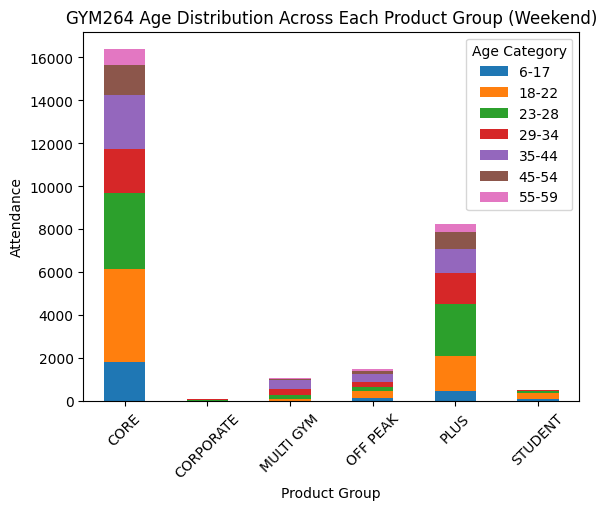

In [ ]:
# Define the age bins
bins = [6, 18, 23, 29, 35, 45, 55, 60]
labels = ['6-17', '18-22', '23-28', '29-34', '35-44', '45-54', '55-59']

def plot_age_distribution(off_peak_schedule_attendance):
    # Filter the DataFrame based on conditions
    filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == '264') &
                                                 (off_peak_schedule_attendance['is_weekend'] == True)].copy()  # Create a copy to avoid SettingWithCopyWarning

    # Bin the ages into categories
    filtered_data.loc[:, 'age_category'] = pd.cut(filtered_data['age'], bins=bins, labels=labels, right=False)

    # Group by product_group and age_category, and count the occurrences
    grouped_data = filtered_data.groupby(['product_group', 'age_category'], observed=False).size().unstack(fill_value=0)

    # Plot the age distribution for each product group
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel('Product Group')
    plt.ylabel('Attendance')
    plt.title('GYM264 Age Distribution Across Each Product Group (Weekend)')
    plt.xticks(rotation=45)
    plt.legend(title='Age Category')
    plt.savefig('GYM264 Age Distribution Across Each Product Group (Weekend).png')
    plt.show()

# View plot
plot_age_distribution(off_peak_schedule_attendance)

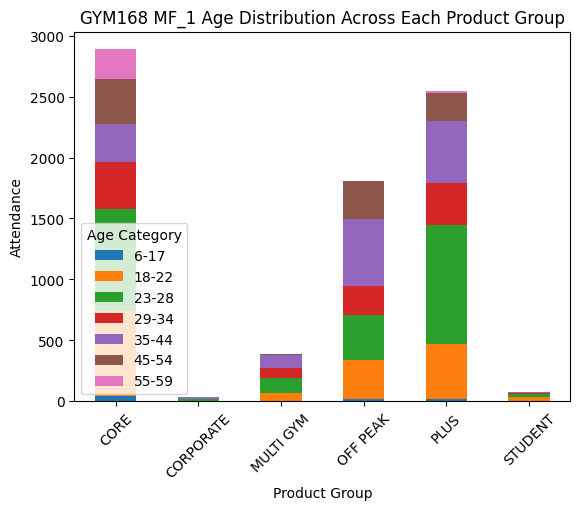

In [ ]:
# Define the age bins
bins = [6, 18, 23, 29, 35, 45, 55, 60]
labels = ['6-17', '18-22', '23-28', '29-34', '35-44', '45-54', '55-59']

def plot_age_distribution(off_peak_schedule_attendance, center_id, is_weekend):
    # Filter the DataFrame based on conditions
    filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == center_id) &
                                                 (off_peak_schedule_attendance['is_weekend'] == is_weekend) &
                                                 (off_peak_schedule_attendance['MF_1'] == True)].copy()  # Create a copy to avoid SettingWithCopyWarning

    # Bin the ages into categories
    filtered_data.loc[:, 'age_category'] = pd.cut(filtered_data['age'], bins=bins, labels=labels, right=False)

    # Group by product_group and age_category, and count the occurrences
    grouped_data = filtered_data.groupby(['product_group', 'age_category'], observed=True).size().unstack(fill_value=0)

    # Plot the age distribution for each product group
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel('Product Group')
    plt.ylabel('Attendance')
    plt.title('GYM168 MF_1 Age Distribution Across Each Product Group')
    plt.xticks(rotation=45)
    plt.legend(title='Age Category')
    plt.savefig('GYM168 MF_1 Age Distribution Across Each Product Group.png')
    plt.show()

# View plot
plot_age_distribution(off_peak_schedule_attendance, '168', False)

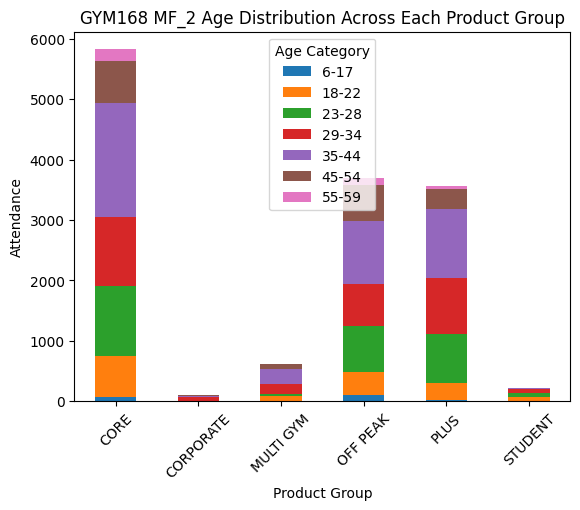

In [ ]:
# Define the age bins
bins = [6, 18, 23, 29, 35, 45, 55, 60]
labels = ['6-17', '18-22', '23-28', '29-34', '35-44', '45-54', '55-59']

def plot_age_distribution(off_peak_schedule_attendance, center_id, is_weekend):
    # Filter the DataFrame based on conditions
    filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == center_id) &
                                                 (off_peak_schedule_attendance['is_weekend'] == is_weekend) &
                                                 (off_peak_schedule_attendance['MF_2'] == True)].copy()  # Create a copy to avoid SettingWithCopyWarning

    # Bin the ages into categories
    filtered_data.loc[:, 'age_category'] = pd.cut(filtered_data['age'], bins=bins, labels=labels, right=False)

    # Group by product_group and age_category, and count the occurrences
    grouped_data = filtered_data.groupby(['product_group', 'age_category'], observed=True).size().unstack(fill_value=0)

    # Plot the age distribution for each product group
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel('Product Group')
    plt.ylabel('Attendance')
    plt.title('GYM168 MF_2 Age Distribution Across Each Product Group')
    plt.xticks(rotation=45)
    plt.legend(title='Age Category')
    plt.savefig('GYM168 MF_2 Age Distribution Across Each Product Group.png')
    plt.show()

#View plot
plot_age_distribution(off_peak_schedule_attendance, '168', False)

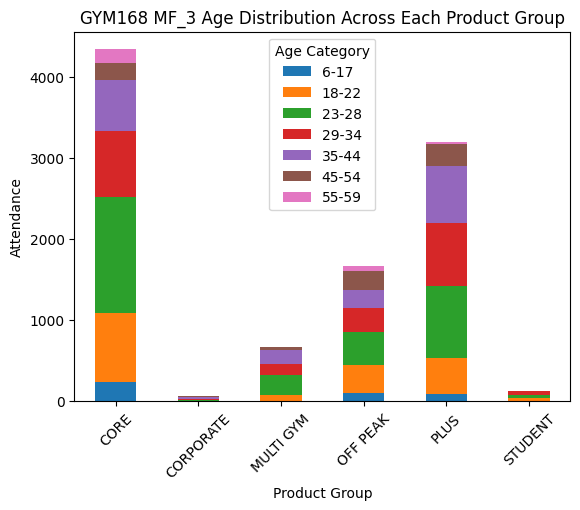

In [ ]:
# Define the age bins
bins = [6, 18, 23, 29, 35, 45, 55, 60]
labels = ['6-17', '18-22', '23-28', '29-34', '35-44', '45-54', '55-59']

def plot_age_distribution(off_peak_schedule_attendance, center_id, is_weekend):
    # Filter the DataFrame based on conditions
    filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == center_id) &
                                                 (off_peak_schedule_attendance['is_weekend'] == is_weekend) &
                                                 (off_peak_schedule_attendance['MF_3'] == True)].copy()  # Create a copy to avoid SettingWithCopyWarning

    # Bin the ages into categories
    filtered_data.loc[:, 'age_category'] = pd.cut(filtered_data['age'], bins=bins, labels=labels, right=False)

    # Group by product_group and age_category, and count the occurrences
    grouped_data = filtered_data.groupby(['product_group', 'age_category'], observed=True).size().unstack(fill_value=0)

    # Plot the age distribution for each product group
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel('Product Group')
    plt.ylabel('Attendance')
    plt.title('GYM168 MF_3 Age Distribution Across Each Product Group')
    plt.xticks(rotation=45)
    plt.legend(title='Age Category')
    plt.savefig('GYM168 MF_3 Age Distribution Across Each Product Group.png')
    plt.show()

# View plot
plot_age_distribution(off_peak_schedule_attendance, '168', False)

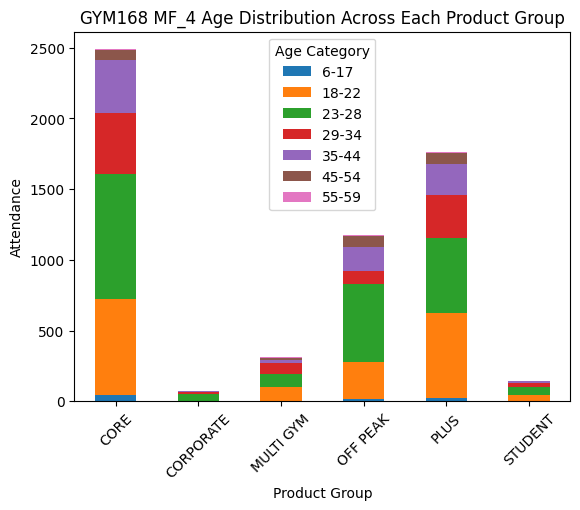

In [ ]:
# Define the age bins
bins = [6, 18, 23, 29, 35, 45, 55, 60]
labels = ['6-17', '18-22', '23-28', '29-34', '35-44', '45-54', '55-59']

def plot_age_distribution(off_peak_schedule_attendance, center_id, is_weekend):
    # Filter the DataFrame based on conditions
    filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == center_id) &
                                                 (off_peak_schedule_attendance['is_weekend'] == is_weekend) &
                                                 (off_peak_schedule_attendance['MF_4'] == True)].copy()  # Create a copy to avoid SettingWithCopyWarning

    # Bin the ages into categories
    filtered_data.loc[:, 'age_category'] = pd.cut(filtered_data['age'], bins=bins, labels=labels, right=False)

    # Group by product_group and age_category, and count the occurrences
    grouped_data = filtered_data.groupby(['product_group', 'age_category'], observed=True).size().unstack(fill_value=0)

    # Plot the age distribution for each product group
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel('Product Group')
    plt.ylabel('Attendance')
    plt.title('GYM168 MF_4 Age Distribution Across Each Product Group')
    plt.xticks(rotation=45)
    plt.legend(title='Age Category')
    plt.savefig('GYM168 MF_4 Gender Distribution Across Each Product Group.png')
    plt.show()

# View plot
plot_age_distribution(off_peak_schedule_attendance, '168', False)

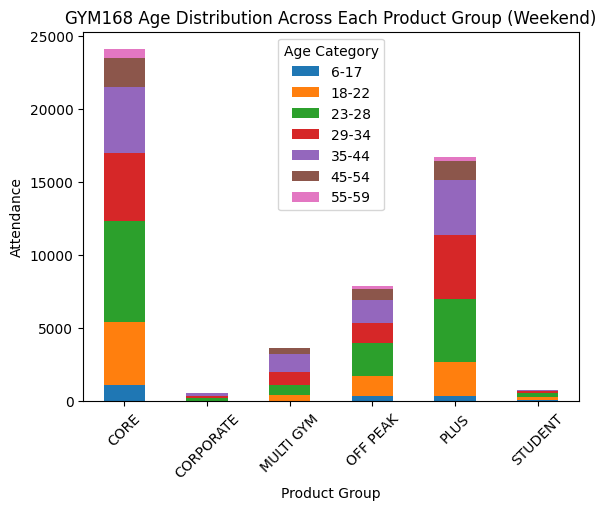

In [ ]:
# Define the age bins
bins = [6, 18, 23, 29, 35, 45, 55, 60]
labels = ['6-17', '18-22', '23-28', '29-34', '35-44', '45-54', '55-59']

def plot_age_distribution(off_peak_schedule_attendance):
    # Filter the DataFrame based on conditions
    filtered_data = off_peak_schedule_attendance[(off_peak_schedule_attendance['center_id'] == '168') &
                                                 (off_peak_schedule_attendance['is_weekend'] == True)].copy()  # Create a copy to avoid SettingWithCopyWarning

    # Bin the ages into categories
    filtered_data.loc[:, 'age_category'] = pd.cut(filtered_data['age'], bins=bins, labels=labels, right=False)

    # Group by product_group and age_category, and count the occurrences
    grouped_data = filtered_data.groupby(['product_group', 'age_category'], observed=False).size().unstack(fill_value=0)

    # Plot the age distribution for each product group
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel('Product Group')
    plt.ylabel('Attendance')
    plt.title('GYM168 Age Distribution Across Each Product Group (Weekend)')
    plt.xticks(rotation=45)
    plt.legend(title='Age Category')
    plt.savefig('GYM168 Age Distribution Across Each Product Group.png')
    plt.show()

#View plot
plot_age_distribution(off_peak_schedule_attendance)

## Question 3. Time-series analysis of the Schedule

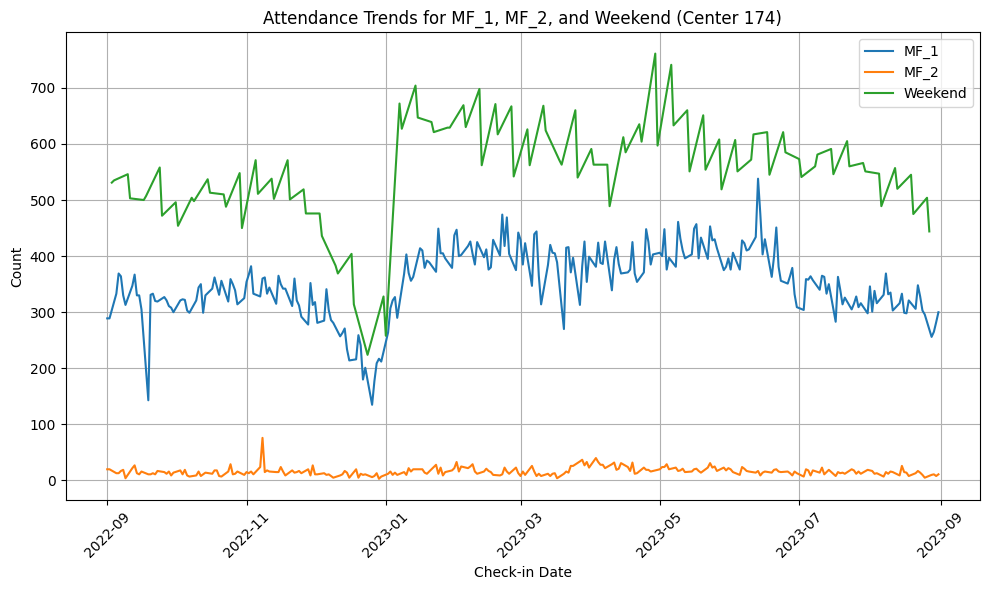

In [ ]:
# Filter rows where center_id is 174
center_174_df = off_peak_schedule_attendance[off_peak_schedule_attendance['center_id'] == '174']

# Count rows where MF_1 is TRUE and is_weekend is FALSE
MF_1_count = center_174_df[(center_174_df['MF_1'] == True) & (center_174_df['is_weekend'] == False)].groupby('check_in_date').size()

# Count rows where MF_2 is TRUE and is_weekend is FALSE
MF_2_count = center_174_df[(center_174_df['MF_2'] == True) & (center_174_df['is_weekend'] == False)].groupby('check_in_date').size()

# Count rows where is_weekend is TRUE
weekend_count = center_174_df[center_174_df['is_weekend'] == True].groupby('check_in_date').size()

# Plot the time series chart
plt.figure(figsize=(10, 6))
plt.plot(MF_1_count.index, MF_1_count.values, label='MF_1')
plt.plot(MF_2_count.index, MF_2_count.values, label='MF_2')
plt.plot(weekend_count.index, weekend_count.values, label='Weekend')
plt.xlabel('Check-in Date')
plt.ylabel('Count')
plt.title('Attendance Trends for MF_1, MF_2, and Weekend (Center 174)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Attendance Trends for MF_1, MF_2, and Weekend (Center 174)')
plt.show()

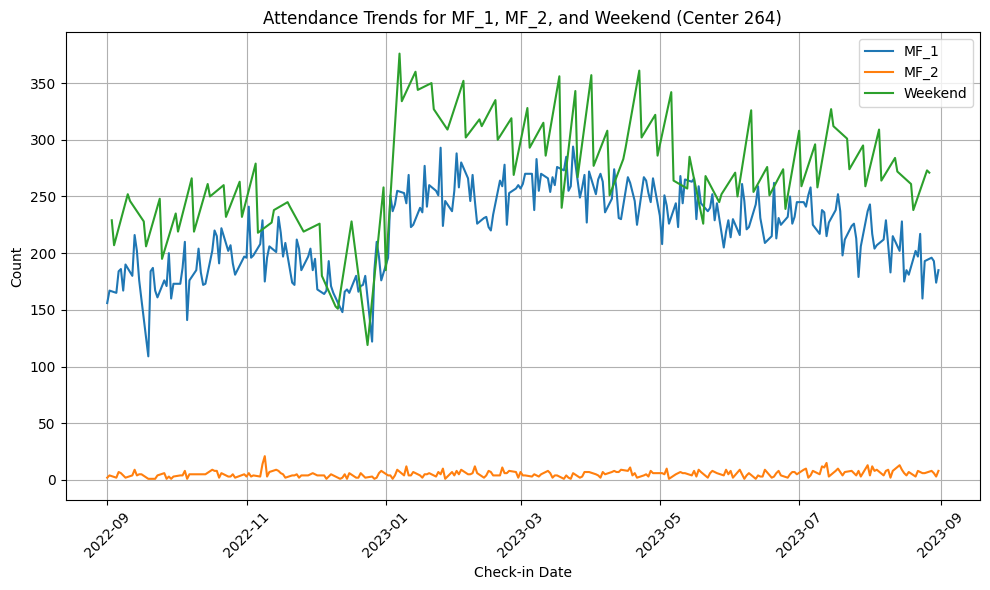

In [ ]:
# Filter rows where center_id is 264
center_264_df = off_peak_schedule_attendance[off_peak_schedule_attendance['center_id'] == '264']

# Count rows where MF_1 is TRUE and is_weekend is FALSE
MF_1_count = center_264_df[(center_264_df['MF_1'] == True) & (center_264_df['is_weekend'] == False)].groupby('check_in_date').size()

# Count rows where MF_2 is TRUE and is_weekend is FALSE
MF_2_count = center_264_df[(center_264_df['MF_2'] == True) & (center_264_df['is_weekend'] == False)].groupby('check_in_date').size()

# Count rows where is_weekend is TRUE
weekend_count = center_264_df[center_264_df['is_weekend'] == True].groupby('check_in_date').size()

# Plot the time series chart
plt.figure(figsize=(10, 6))
plt.plot(MF_1_count.index, MF_1_count.values, label='MF_1')
plt.plot(MF_2_count.index, MF_2_count.values, label='MF_2')
plt.plot(weekend_count.index, weekend_count.values, label='Weekend')
plt.xlabel('Check-in Date')
plt.ylabel('Count')
plt.title('Attendance Trends for MF_1, MF_2, and Weekend (Center 264)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Attendance Trends for MF_1, MF_2, and Weekend (Center 264)')
plt.show()

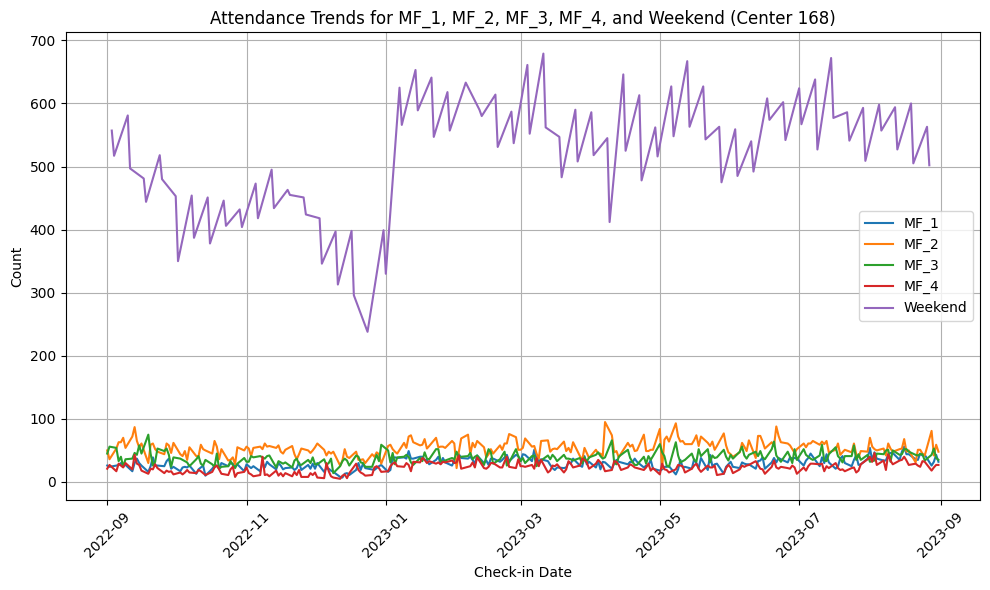

In [ ]:
# Filter rows where center_id is 168
center_168_df = off_peak_schedule_attendance[off_peak_schedule_attendance['center_id'] == '168']

# Count rows where MF_1 is TRUE and is_weekend is FALSE
MF_1_count = center_168_df[(center_168_df['MF_1'] == True) & (center_168_df['is_weekend'] == False)].groupby('check_in_date').size()

# Count rows where MF_2 is TRUE and is_weekend is FALSE
MF_2_count = center_168_df[(center_168_df['MF_2'] == True) & (center_168_df['is_weekend'] == False)].groupby('check_in_date').size()

# Count rows where MF_3 is TRUE and is_weekend is FALSE
MF_3_count = center_168_df[(center_168_df['MF_3'] == True) & (center_168_df['is_weekend'] == False)].groupby('check_in_date').size()

# Count rows where MF_4 is TRUE and is_weekend is FALSE
MF_4_count = center_168_df[(center_168_df['MF_4'] == True) & (center_168_df['is_weekend'] == False)].groupby('check_in_date').size()

# Count rows where is_weekend is TRUE
weekend_count = center_168_df[center_168_df['is_weekend'] == True].groupby('check_in_date').size()

# Plot the time series chart
plt.figure(figsize=(10, 6))
plt.plot(MF_1_count.index, MF_1_count.values, label='MF_1')
plt.plot(MF_2_count.index, MF_2_count.values, label='MF_2')
plt.plot(MF_3_count.index, MF_3_count.values, label='MF_3')
plt.plot(MF_4_count.index, MF_4_count.values, label='MF_4')
plt.plot(weekend_count.index, weekend_count.values, label='Weekend')
plt.xlabel('Check-in Date')
plt.ylabel('Count')
plt.title('Attendance Trends for MF_1, MF_2, MF_3, MF_4, and Weekend (Center 168)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Attendance Trends for MF_1, MF_2, MF_3, MF_4 and Weekend (Center 168)')
plt.show()

**Question 5. AOI**